A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Import libraries and check basics of data


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [ ]:
# Read the train data
df = pd.read_csv('/content/drive/MyDrive/Data Science/Advanced Regression/train.csv', keep_default_na=True, na_values=['-1.#IND', '1.#QNAN',
                            '1.#IND', '-1.#QNAN','', '#N/A',       
                             'N/A',  '#NA', 'NULL', 'NaN', '-NaN', 'nan', '-nan'])

In [ ]:
# Check the top 5 values
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
# Check the shape of the dataframe
df.shape

(1460, 81)

In [ ]:
# Call info on dataframe to get some insight about hte data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Check the distribute of all the numeric values
df.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

## Data cleaning


In [ ]:
# check null % of columns
df.isnull().sum()/df.count()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      21.565362
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [ ]:
#Get the columns where the values is greater than 0, this we will need to handle one by one
df.columns.values[df.isnull().sum()/df.count()*100>0]

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [ ]:
# if more than 80% values are null, we wont be able to get much insighnt from them
df.columns.values[df.isnull().sum()/df.count()*100>80]

array(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype=object)

In [ ]:
# dropping the columns where more than 80% values are null
df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [ ]:
# Check the shape after dropping the values
df.shape

(1460, 76)

In [ ]:
# Check how many columns are still having null values
df.columns.values[df.isnull().sum()/df.count()*100>0]

array(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'], dtype=object)

In [ ]:
# Create a list of all the columns where null values are present
null_columns = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond']

In [ ]:
# Check null % for above columns
df[null_columns].isnull().sum()/ df[null_columns].count()*100

LotFrontage     21.565362
MasVnrType       0.550964
MasVnrArea       0.550964
BsmtQual         2.600141
BsmtCond         2.600141
BsmtExposure     2.672293
BsmtFinType1     2.600141
BsmtFinType2     2.672293
Electrical       0.068540
GarageType       5.873822
GarageYrBlt      5.873822
GarageFinish     5.873822
GarageQual       5.873822
GarageCond       5.873822
dtype: float64

In [ ]:
# just a check to confirm is there is any 'NA' string, which is valid value is present 
for col in null_columns:
  print(df[col].value_counts()[df[col].value_counts().keys().map(lambda x: x=='NA')])

Series([], Name: LotFrontage, dtype: int64)
Series([], Name: MasVnrType, dtype: int64)
Series([], Name: MasVnrArea, dtype: int64)
Series([], Name: BsmtQual, dtype: int64)
Series([], Name: BsmtCond, dtype: int64)
Series([], Name: BsmtExposure, dtype: int64)
Series([], Name: BsmtFinType1, dtype: int64)
Series([], Name: BsmtFinType2, dtype: int64)
Series([], Name: Electrical, dtype: int64)
Series([], Name: GarageType, dtype: int64)
Series([], Name: GarageYrBlt, dtype: int64)
Series([], Name: GarageFinish, dtype: int64)
Series([], Name: GarageQual, dtype: int64)
Series([], Name: GarageCond, dtype: int64)


In [ ]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [ ]:
# Split the null_columns list to categorical_null and numerical_null list, this i have done to simplify handling the null values.
categorical_null = df[null_columns].select_dtypes(include='object').columns
numerical_null = l_null = df[null_columns].select_dtypes(exclude='object').columns

In [ ]:
# Overall category or numerical column, this i have do to simplify the analysation process.
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns

In [ ]:
# remove SalePrice as this is the target variable, for analyzing we will compare other features relationship with the target variable. 
numerical_columns = numerical_columns[numerical_columns.map(lambda x : x !='SalePrice')]

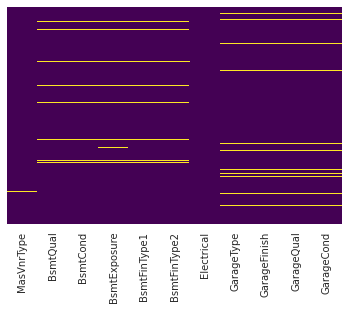

In [ ]:
# Plot heat map to check the null values for categorical data
sns.heatmap(df[categorical_null].isnull(),yticklabels=False,cbar=False,cmap='viridis')

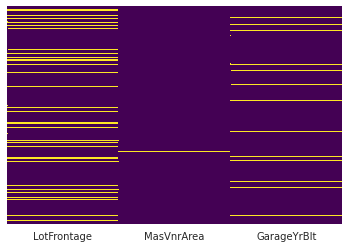

In [ ]:
# Plot heat map to check the null values for numerical data
sns.heatmap(df[numerical_null].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# We are filling the null values with mean , we will come back and see if median makes more sense
df[numerical_null] = df[numerical_null].fillna(df[numerical_null].mean())

In [ ]:
# Replace null values with Mode 
for col in categorical_null:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Check null % for above columns
df[null_columns].isnull().sum()/ df[null_columns].count()*100

LotFrontage     0.0
MasVnrType      0.0
MasVnrArea      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

In [ ]:
# Check if any null value is present
df.columns[df.isnull().sum()/ df.count()*100>0]

Index([], dtype='object')

In [ ]:
# Id is a dataset artifact, not something useful for analysis
df.drop("Id", axis=1, inplace=True)

In [ ]:
# remove Id as this is a unique value, it will not provide any insights in data analysation.
numerical_columns = numerical_columns[numerical_columns.map(lambda x : x !='Id')]

### Analyzing Categorical Variable

In [ ]:
# Check how the dataframe is looking after handling null values
df.head()

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0          60       RL         65.0  ...        WD        Normal    208500
1          20       RL         80.0  ...        WD        Normal    181500
2          60       RL         68.0  ...        WD        Normal    223500
3          70       RL         60.0  ...        WD       Abnorml    140000
4          60       RL         84.0  ...        WD        Normal    250000

[5 rows x 75 columns]

In [ ]:
# Check for the current shape of the dataframe
df.shape

(1460, 75)

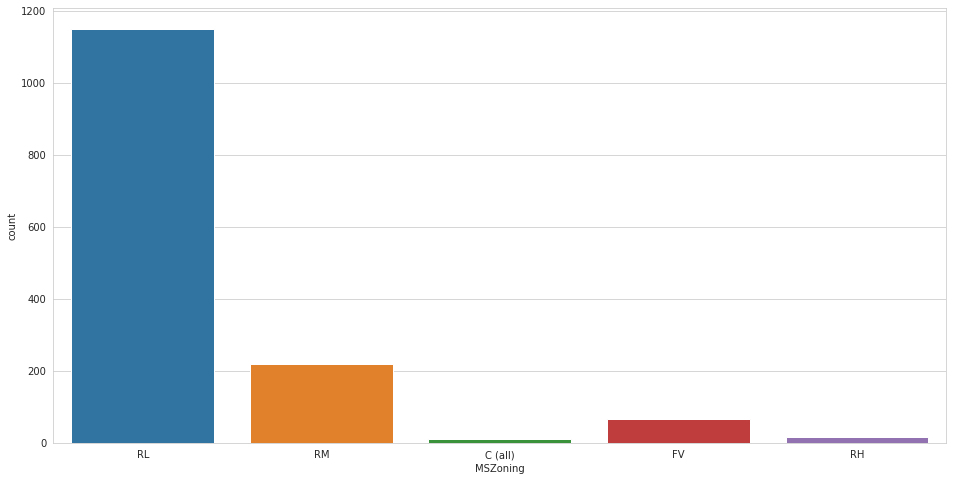

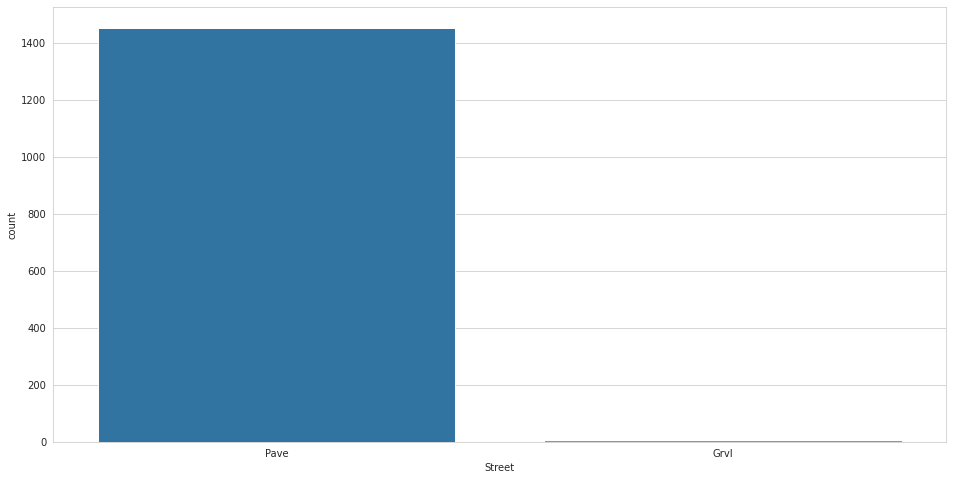

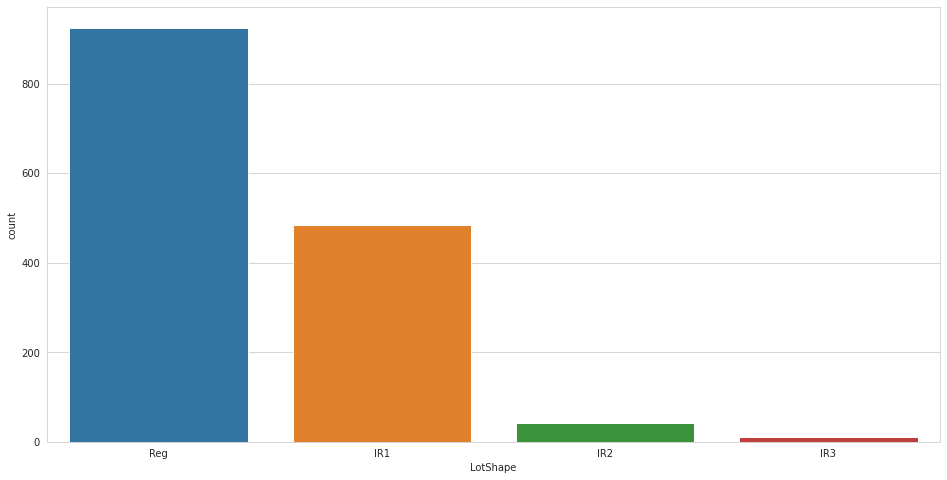

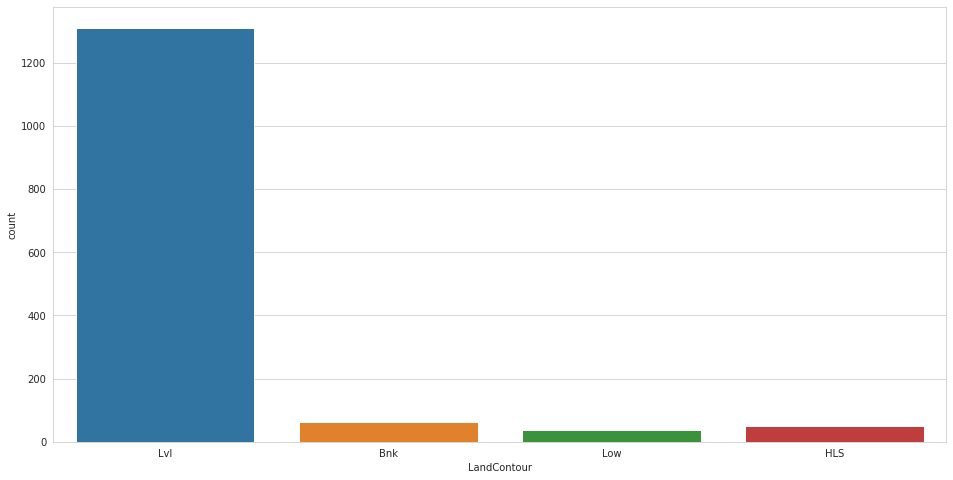

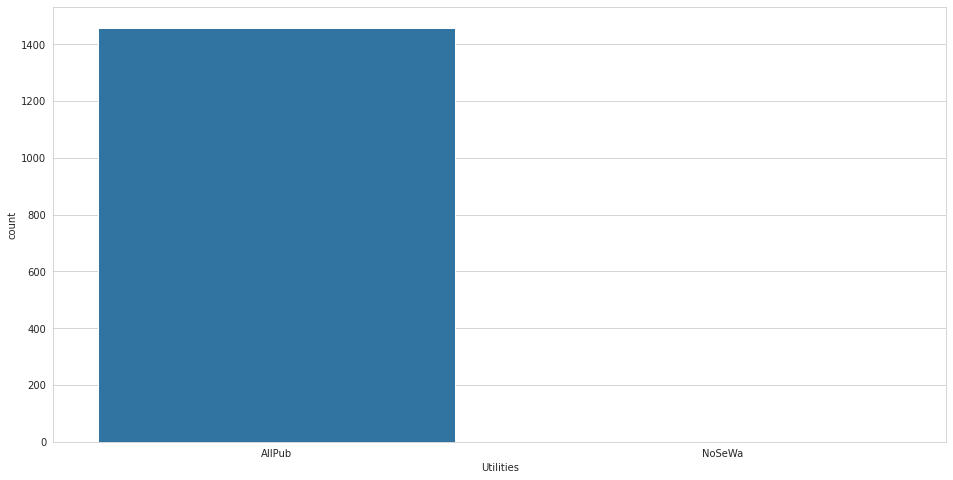

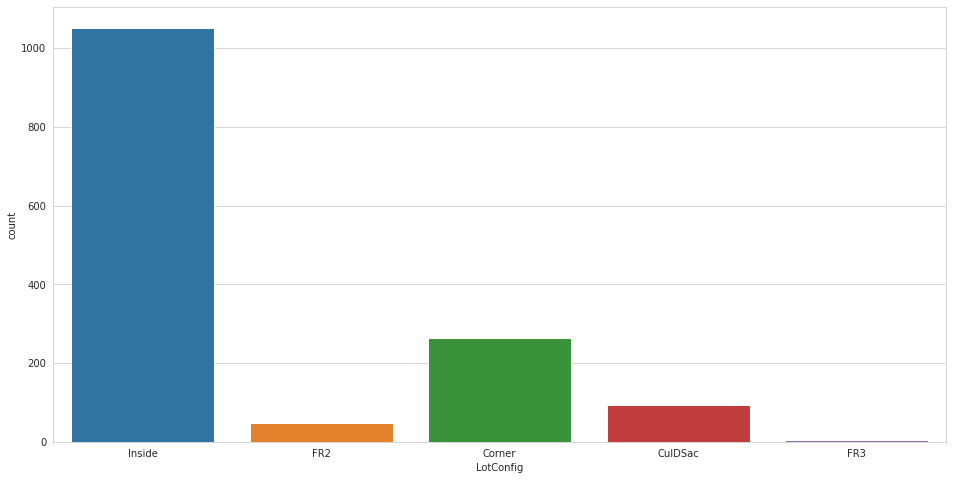

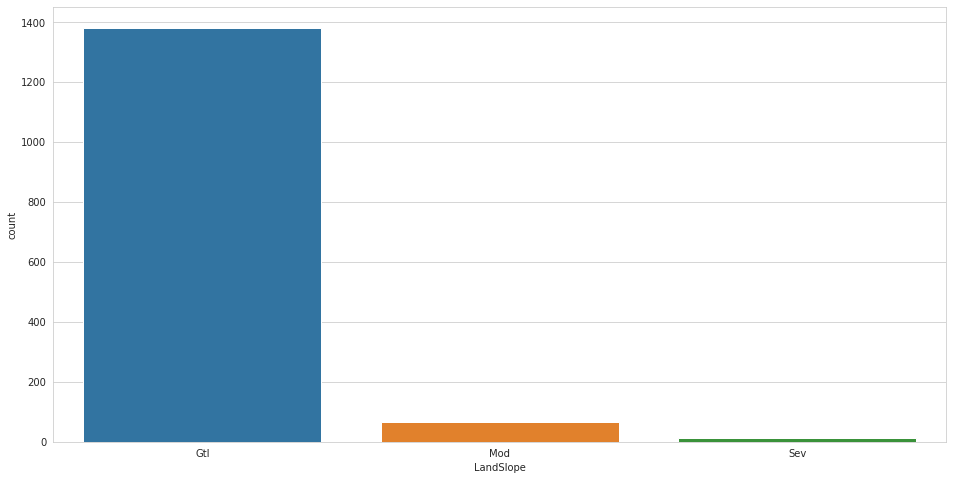

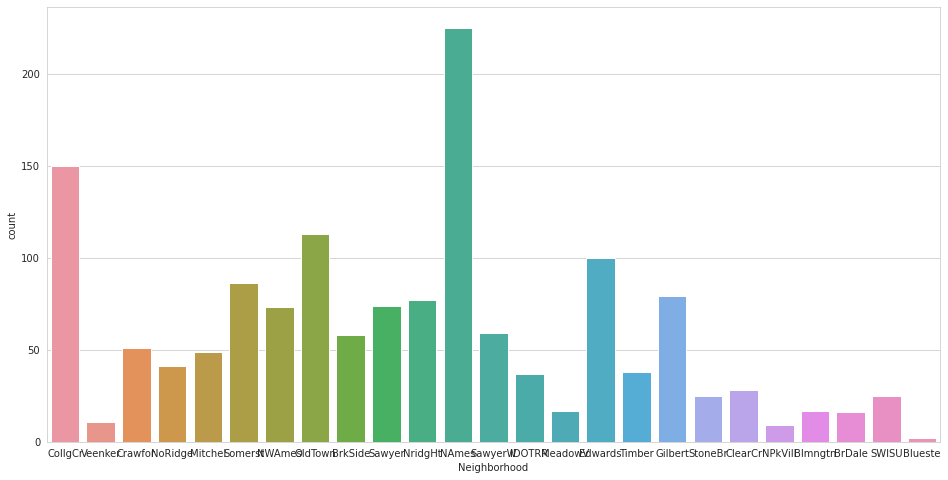

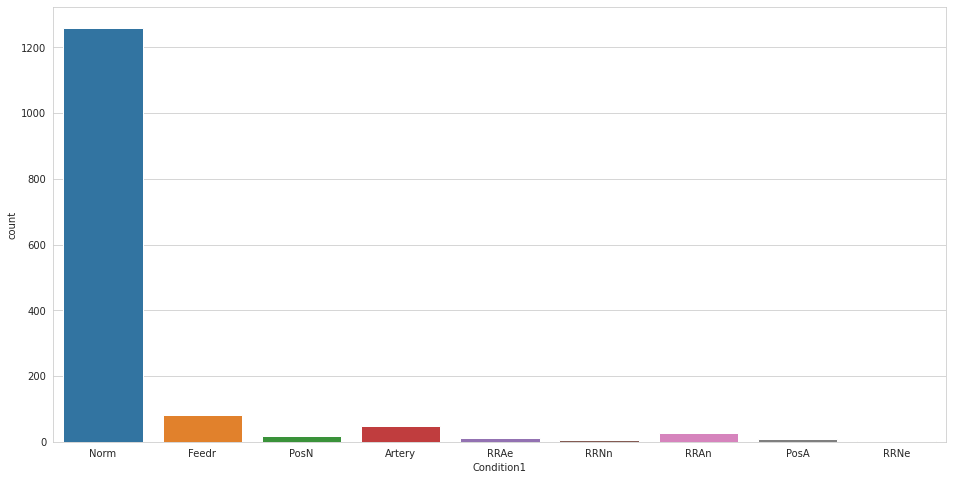

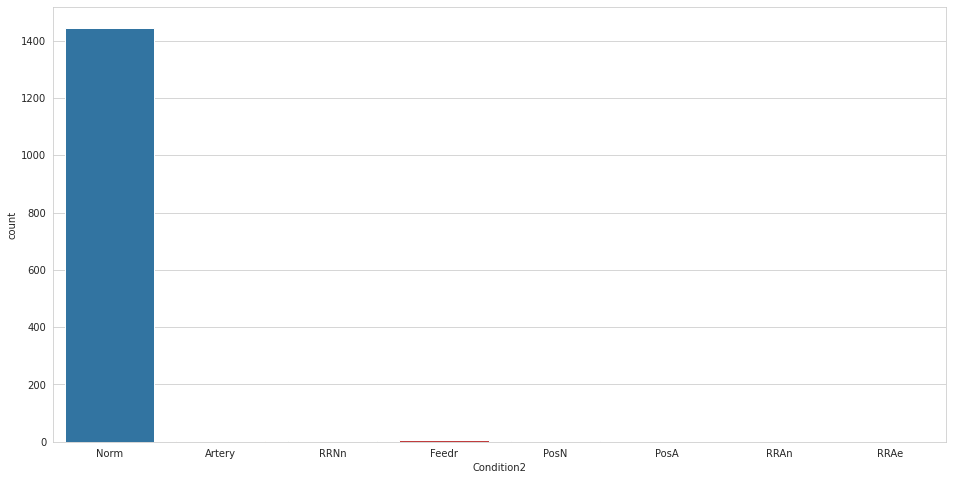

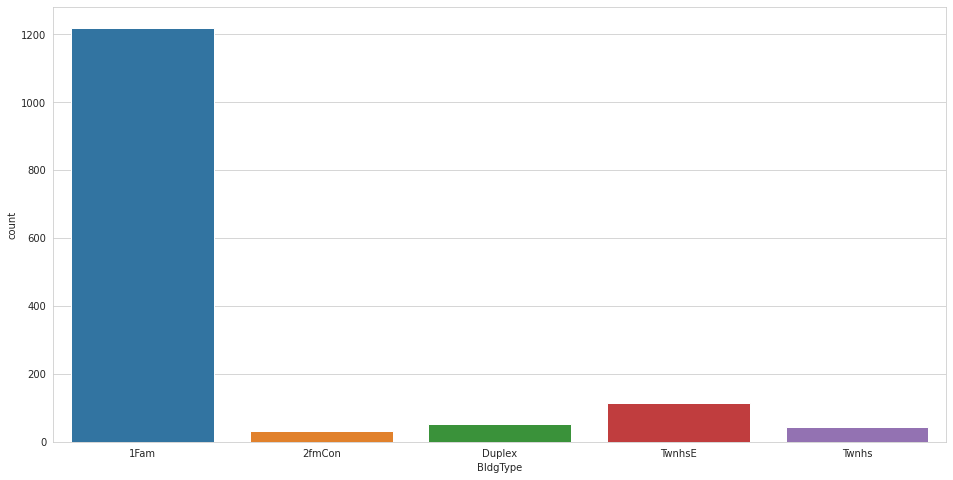

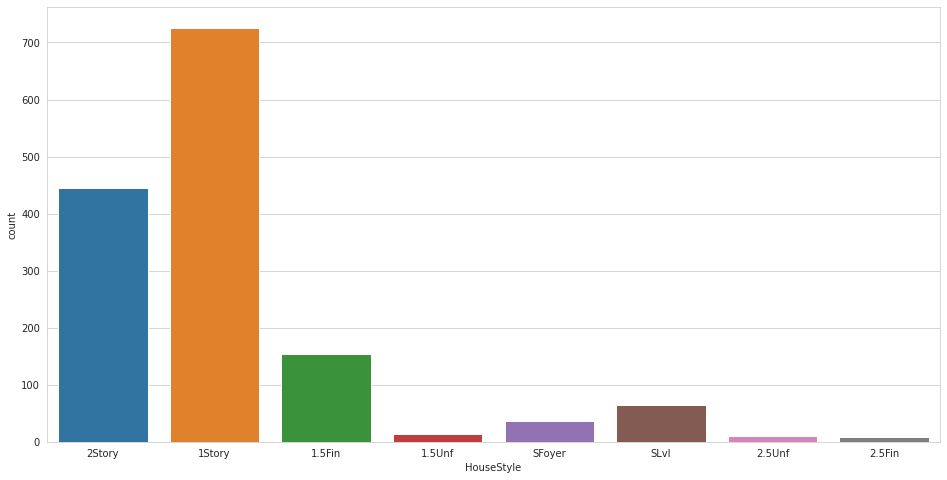

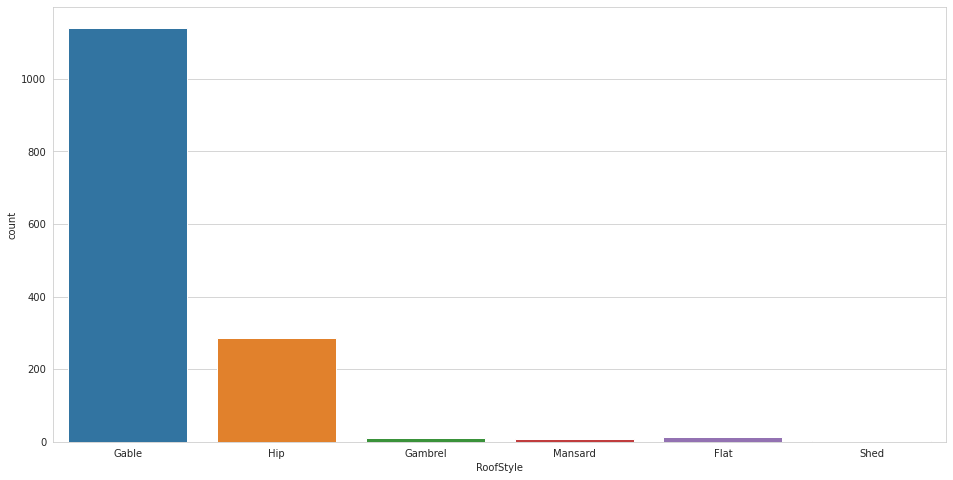

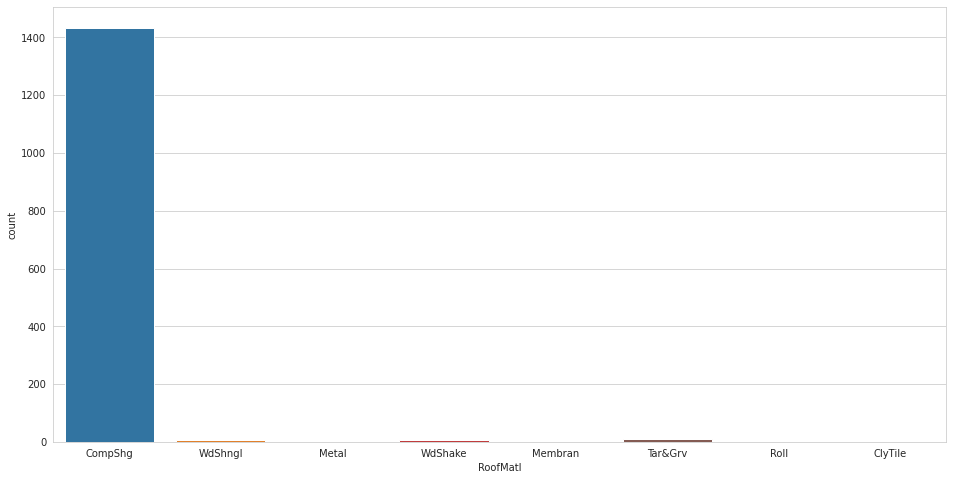

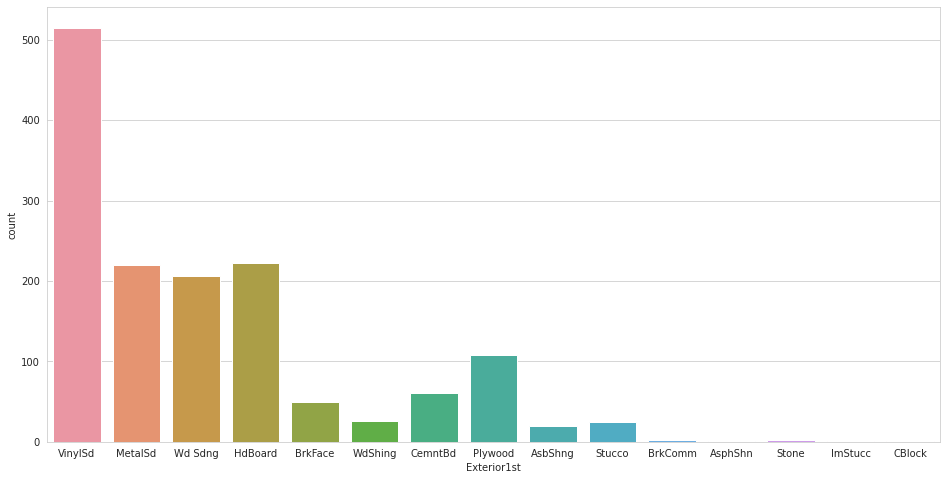

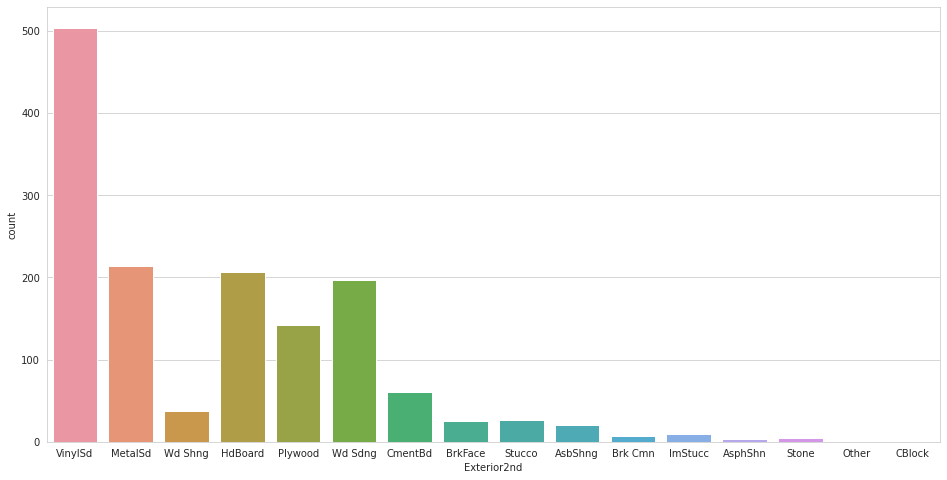

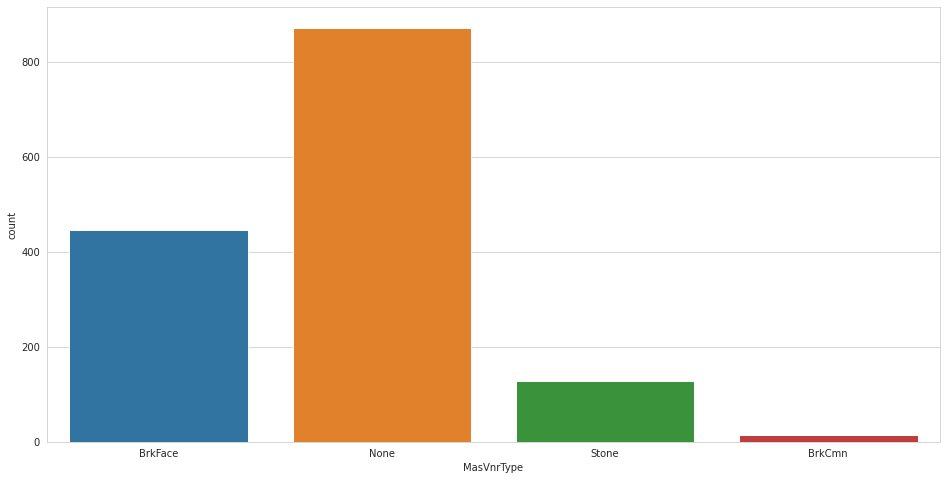

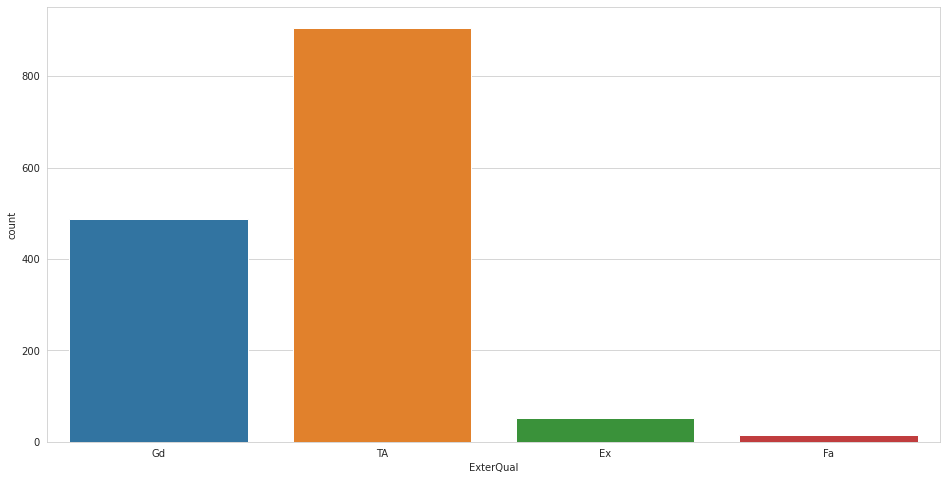

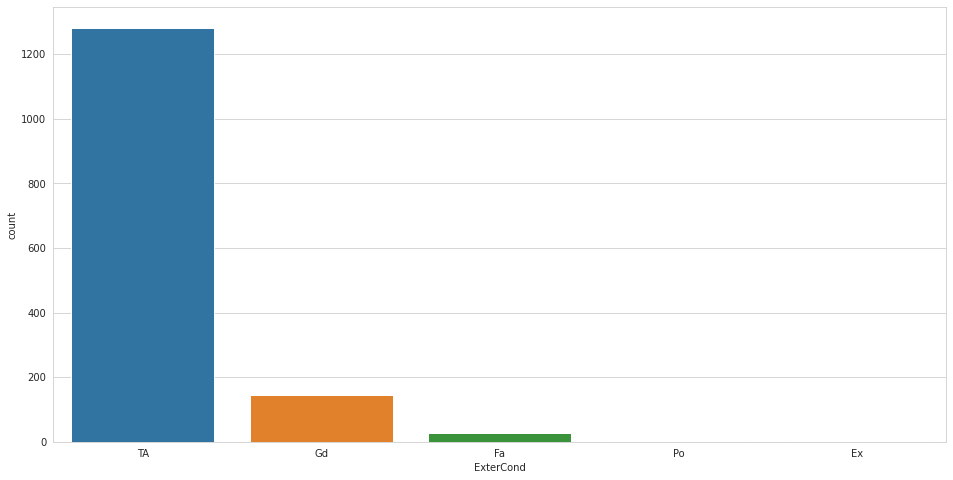

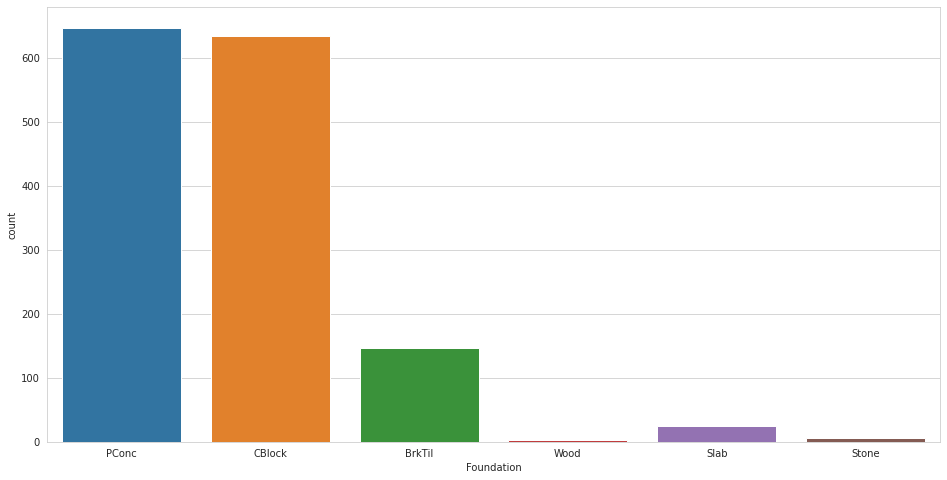

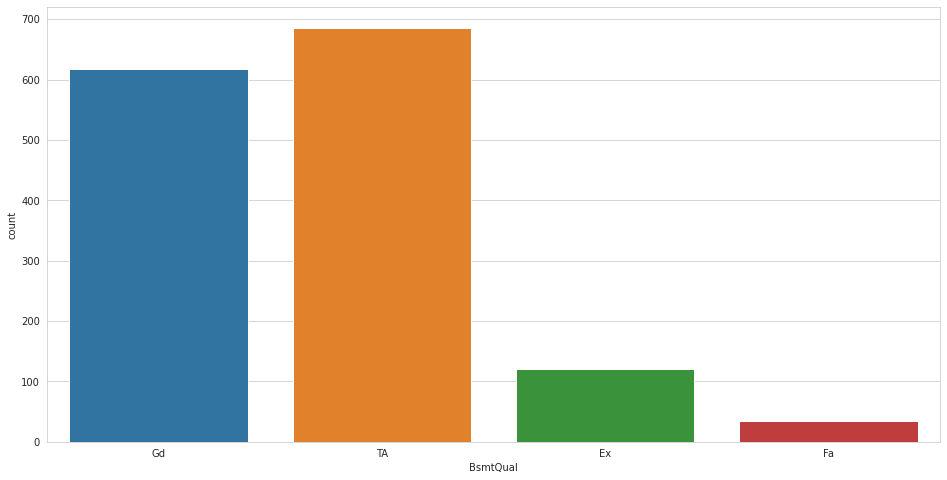

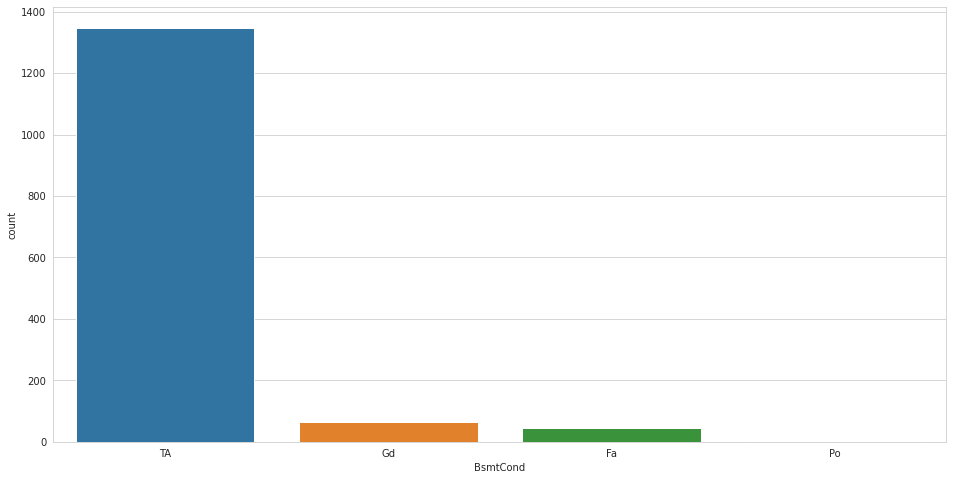

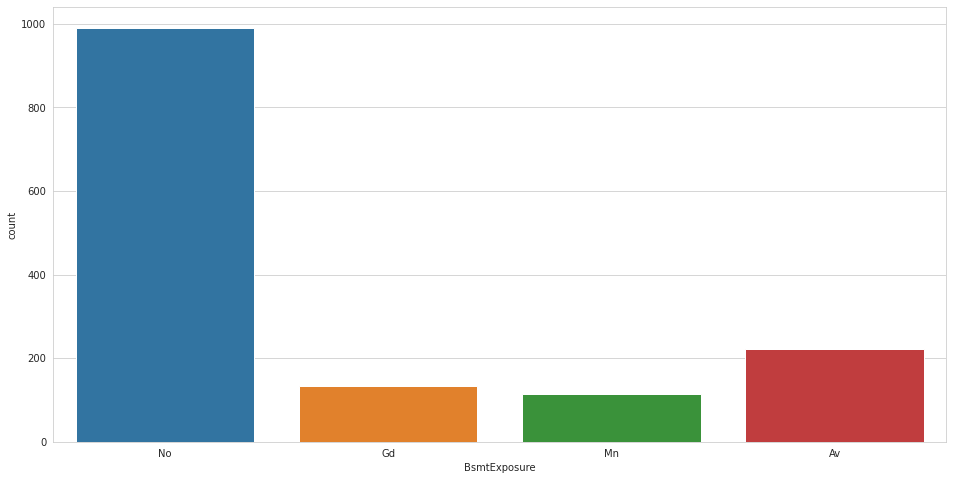

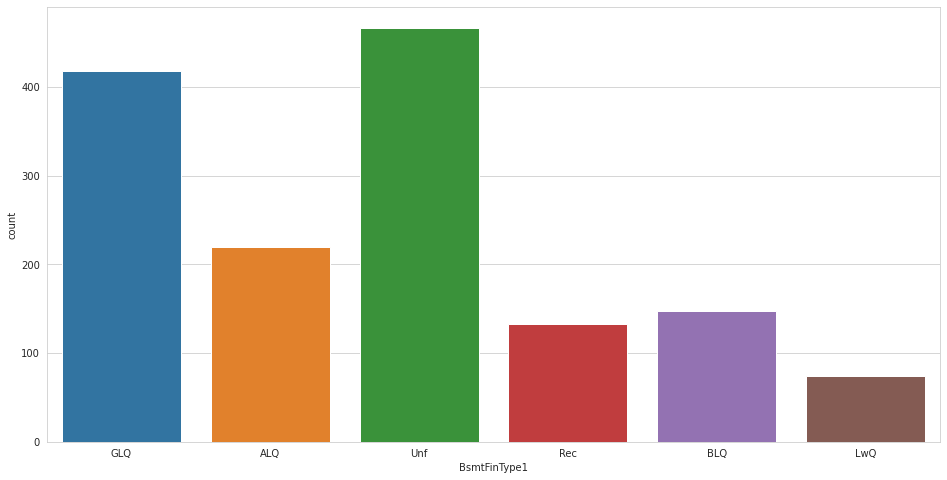

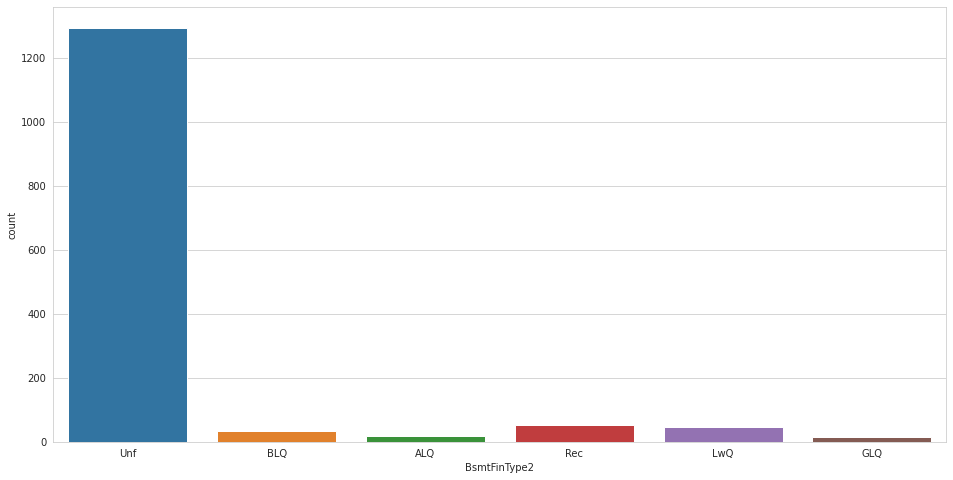

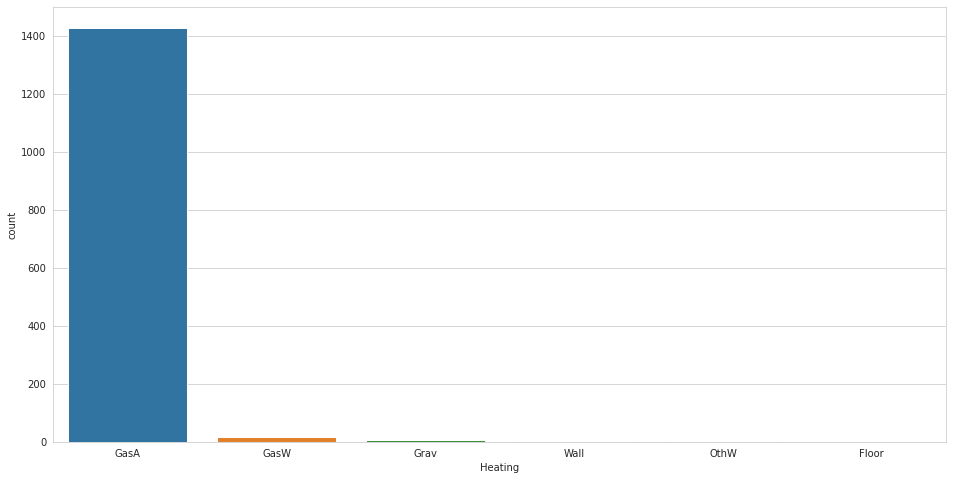

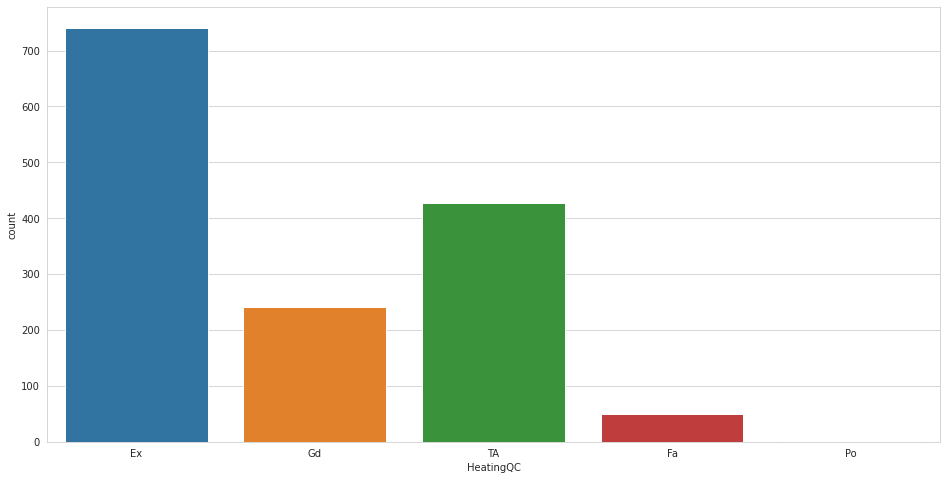

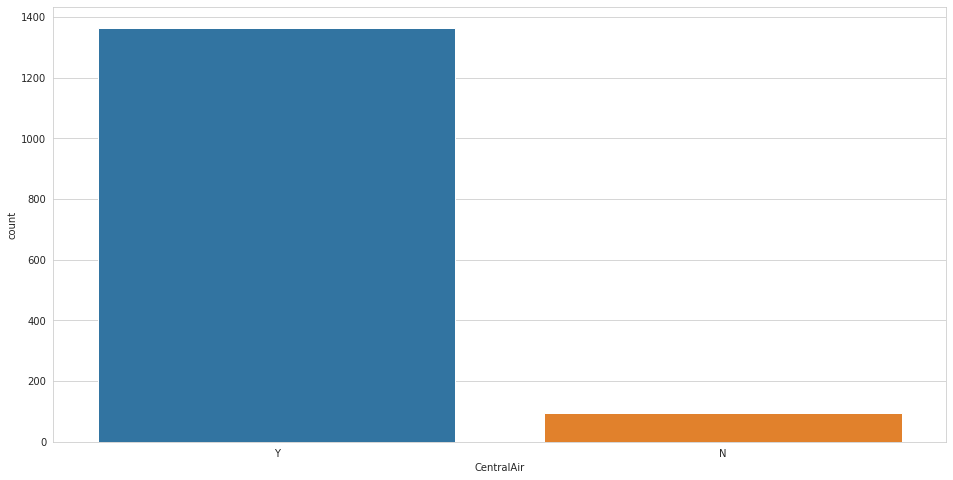

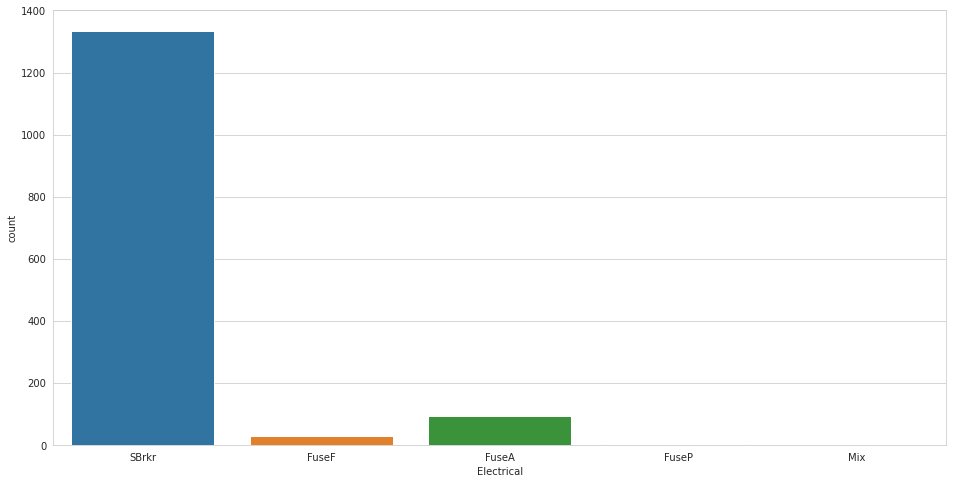

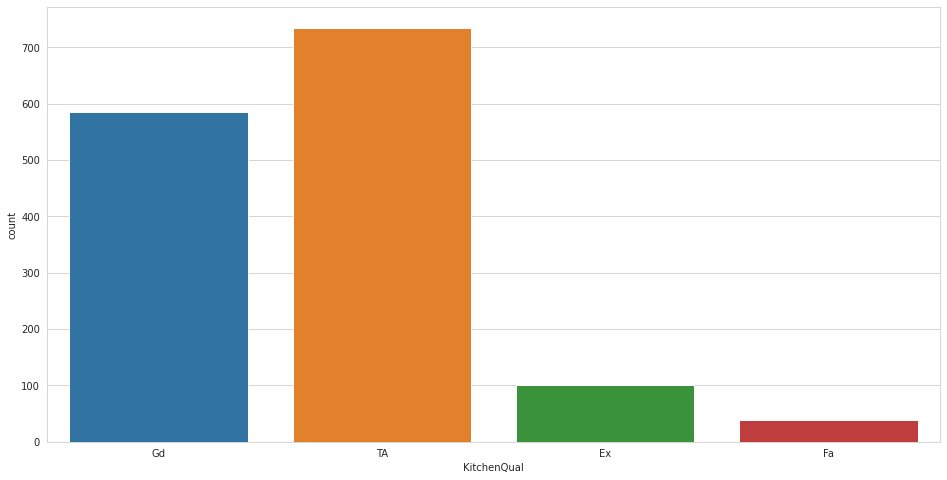

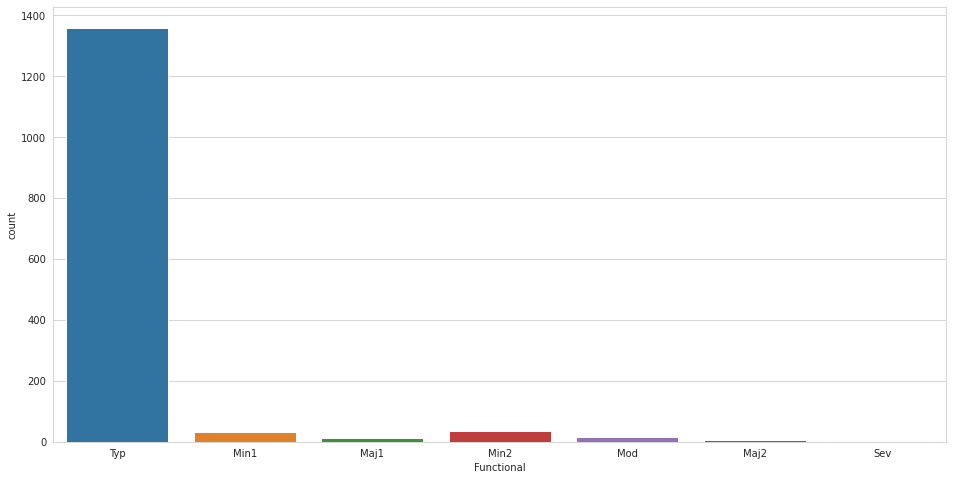

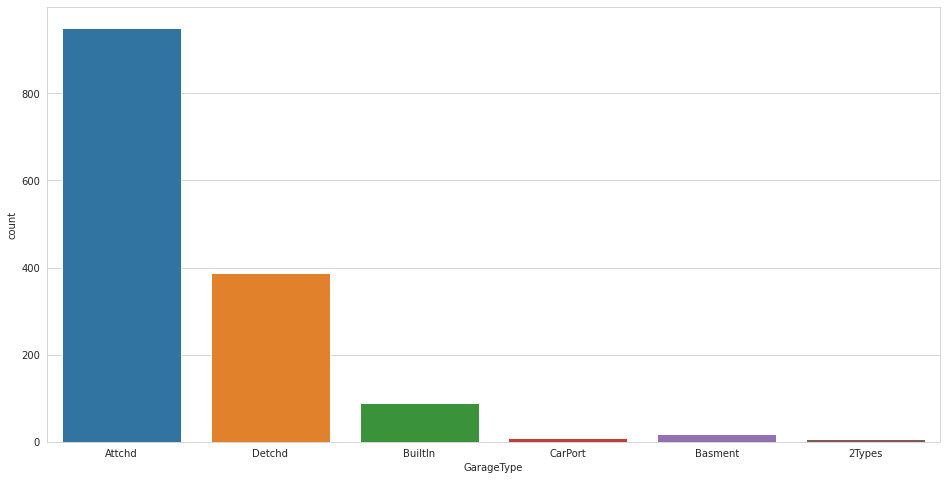

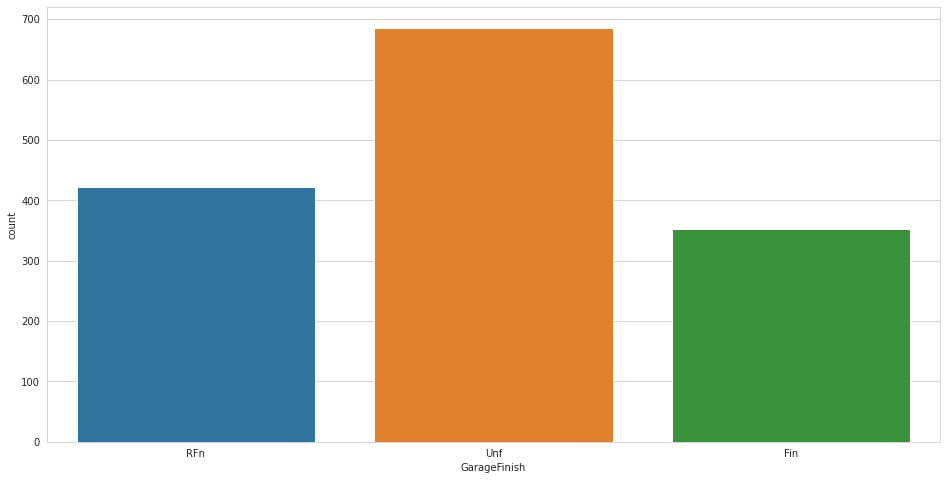

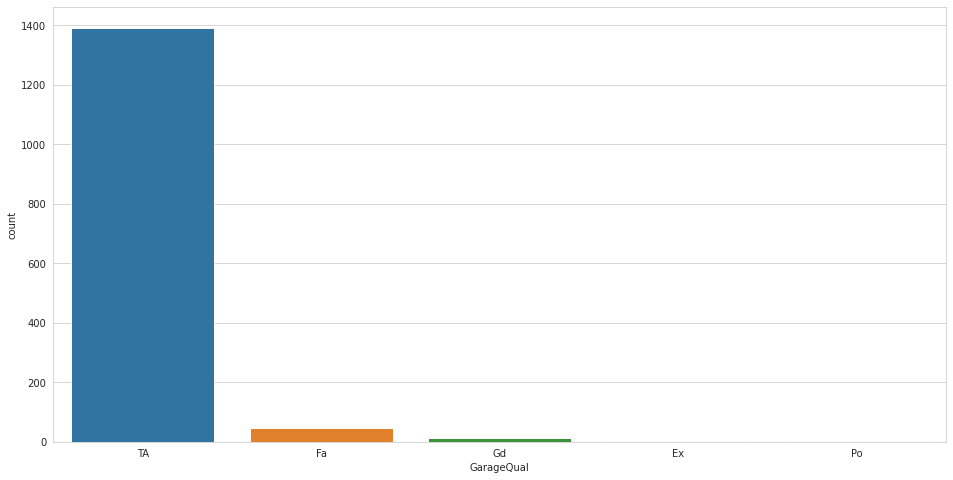

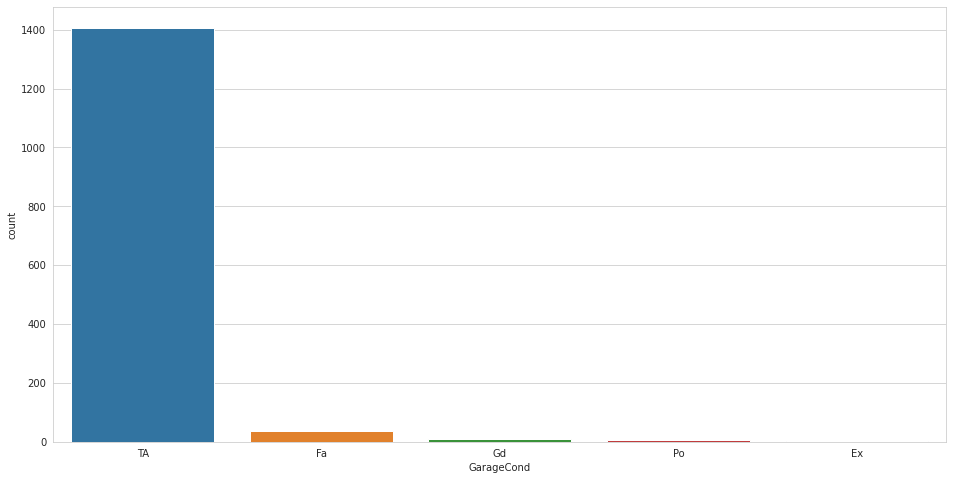

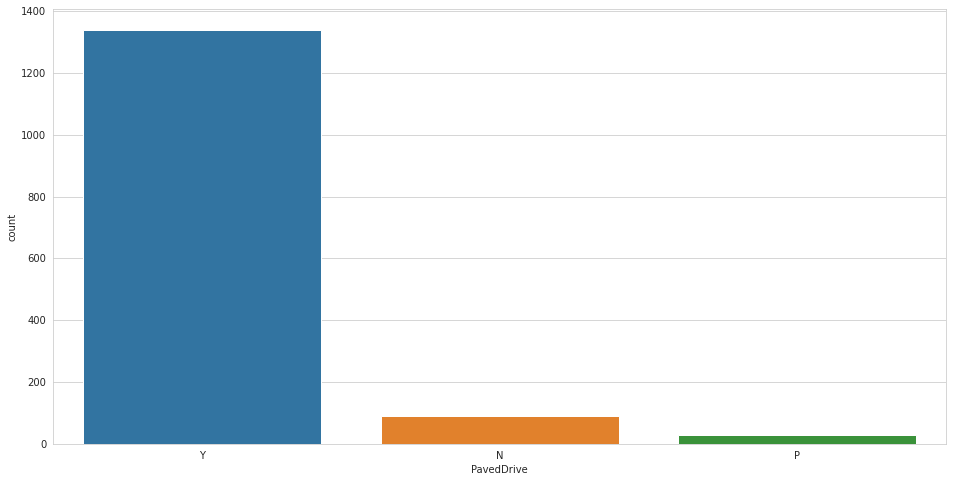

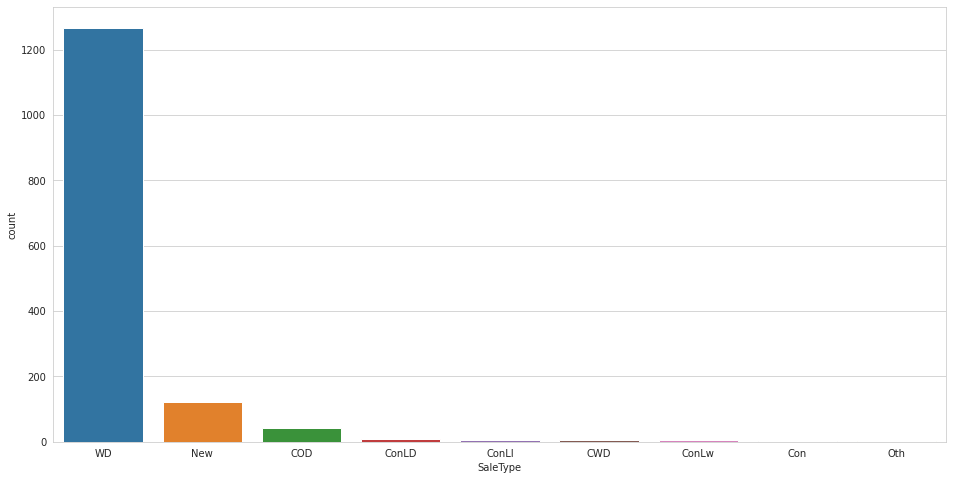

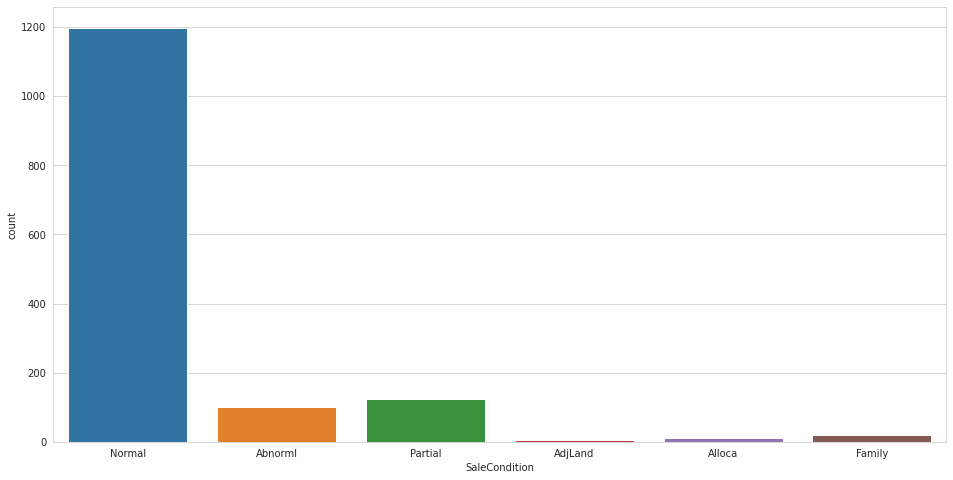

In [ ]:
# Check the distribution of values in the categorical columns, incase there is only one value we should remove that columns as it wont add any value to our model
for col in categorical_columns:
  #print(df[col].value_counts())
  plt.figure(figsize=(16,8))
  sns.countplot(data = df[categorical_columns], x = col)
  plt.show()
  print('\n')

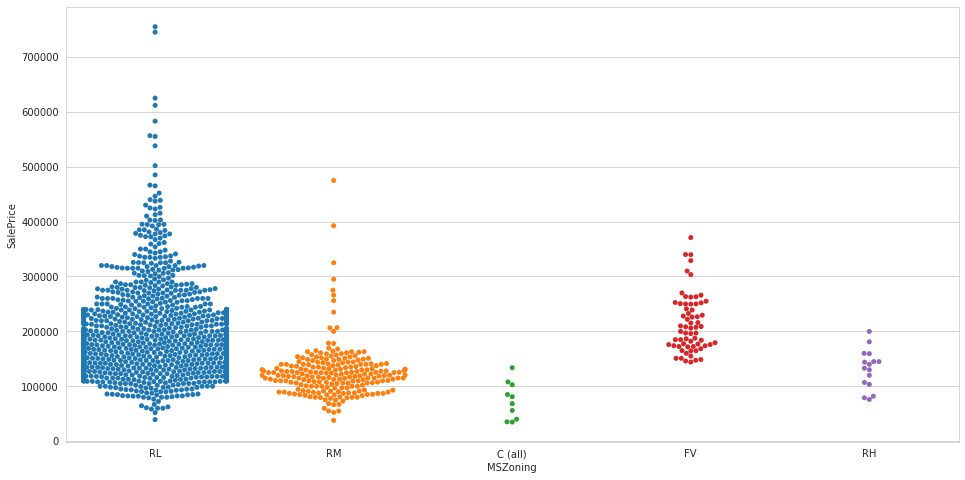

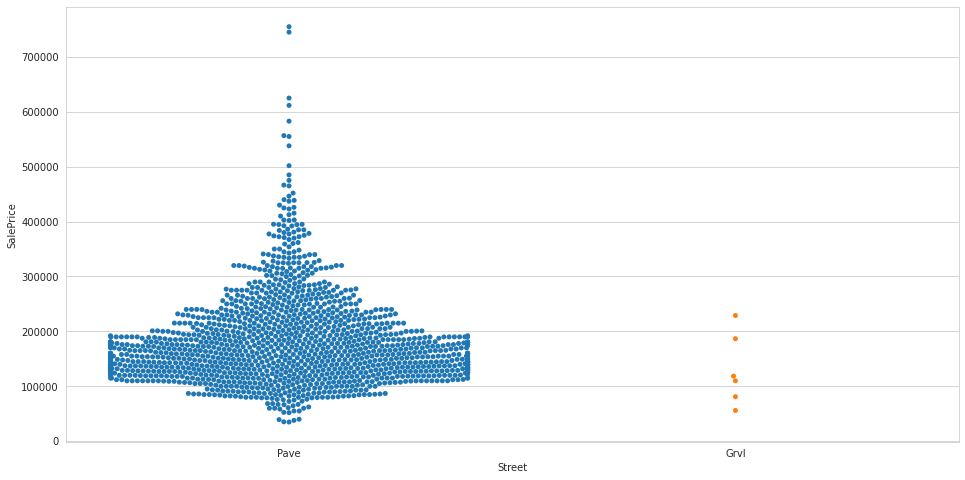

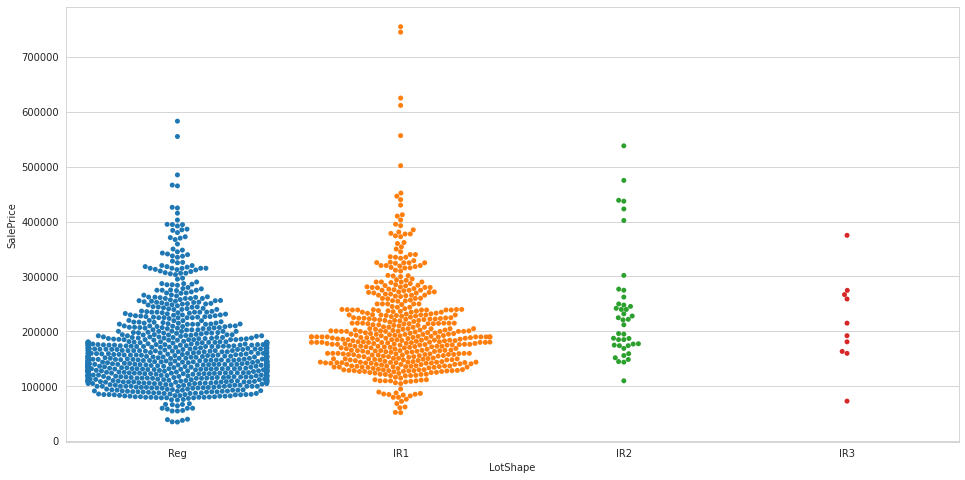

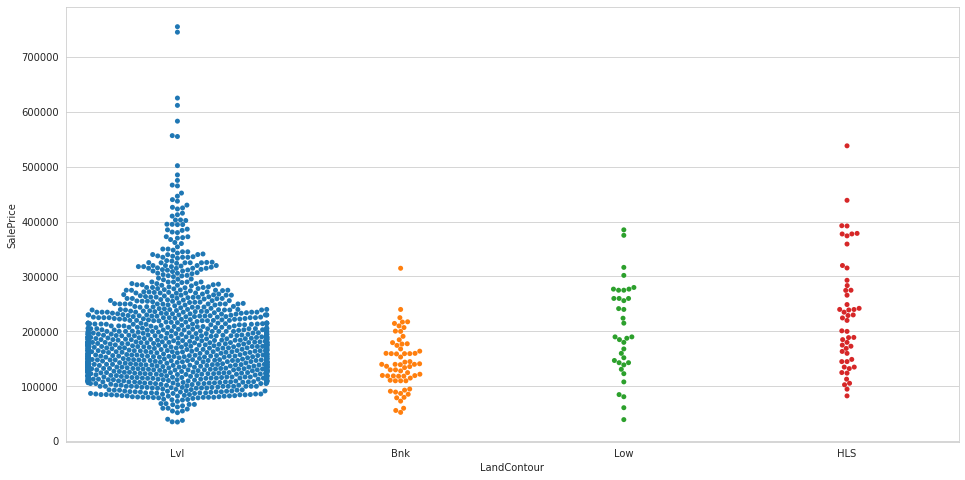

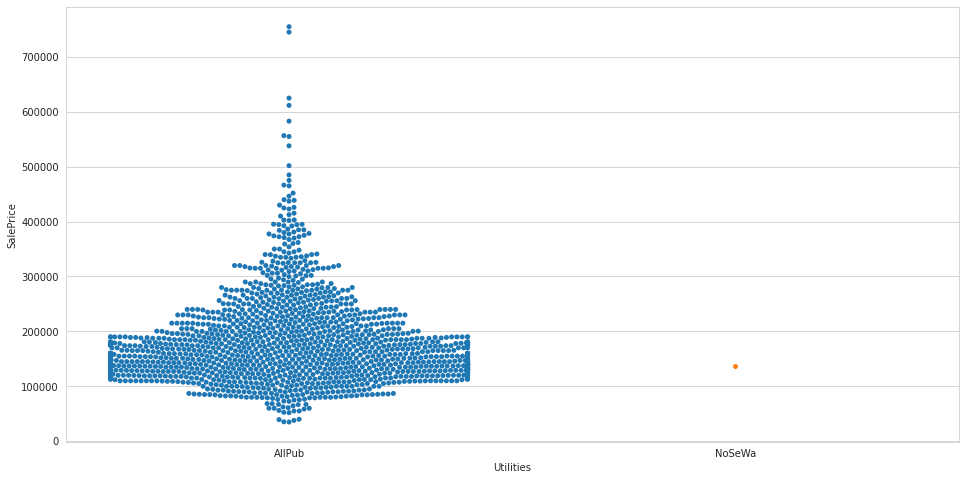

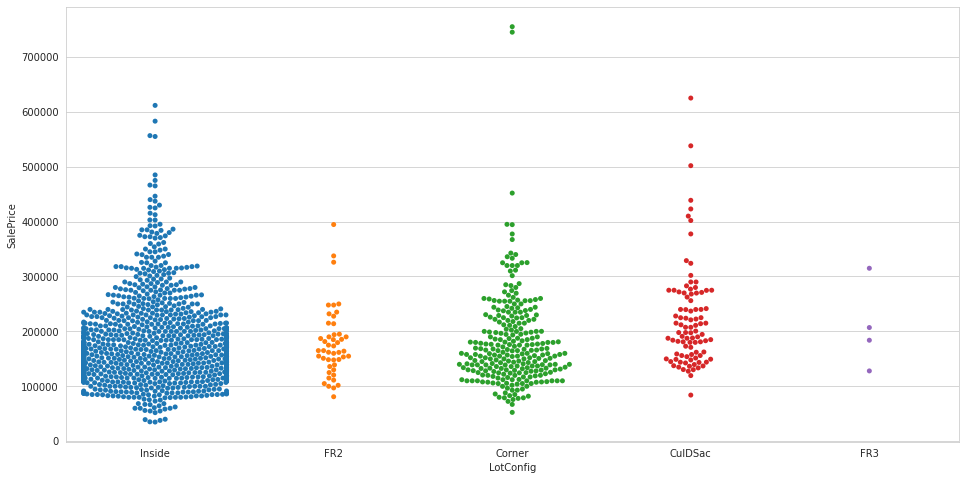

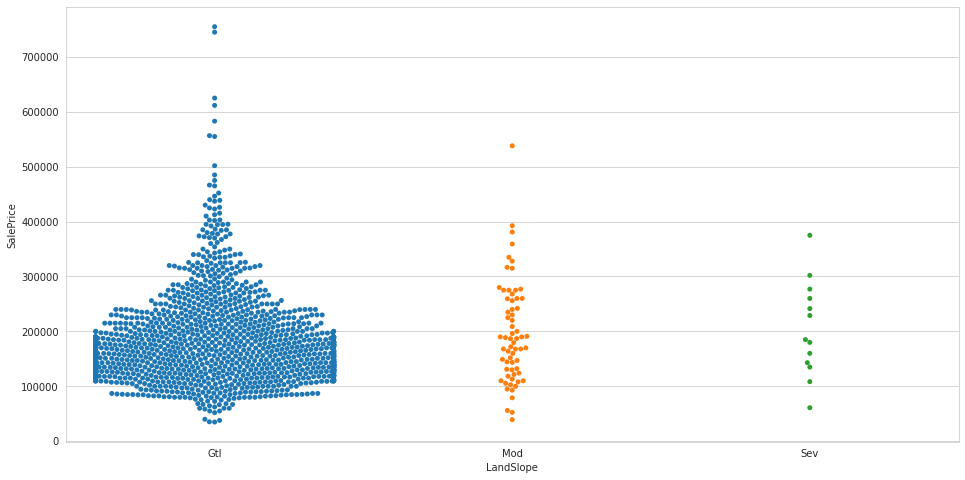

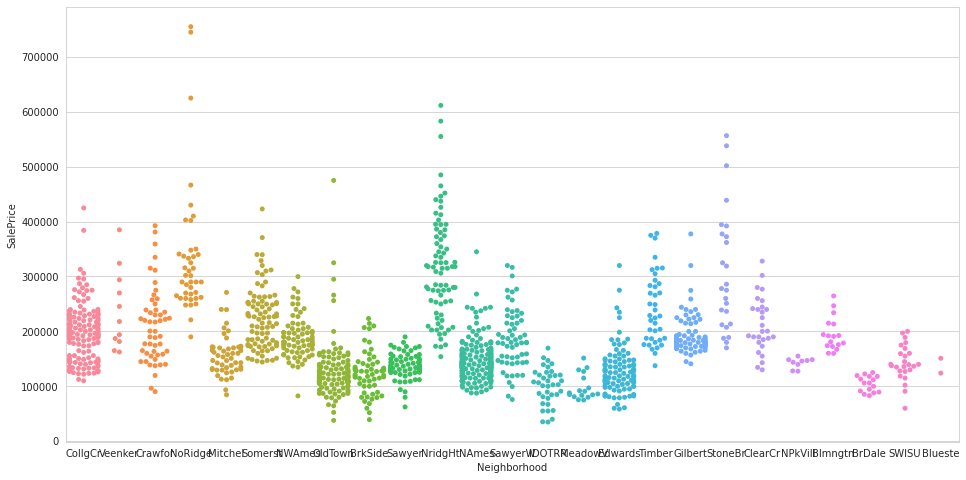

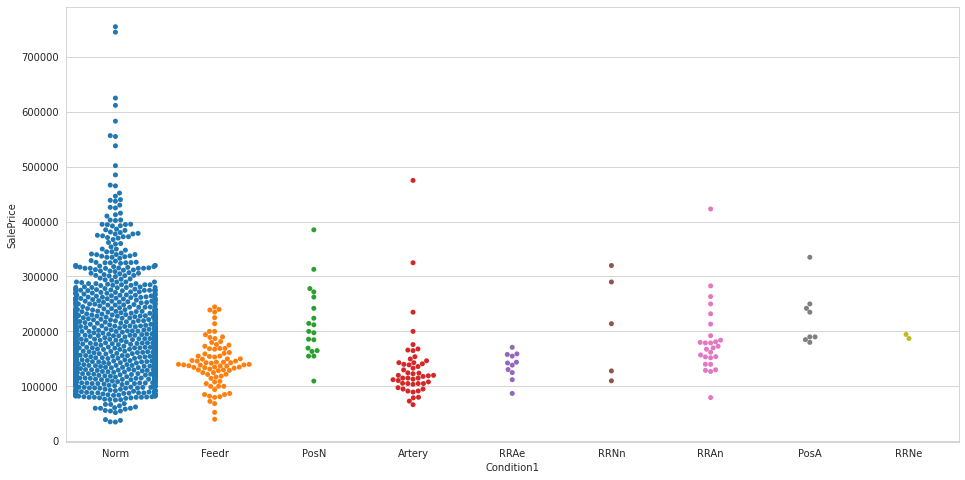

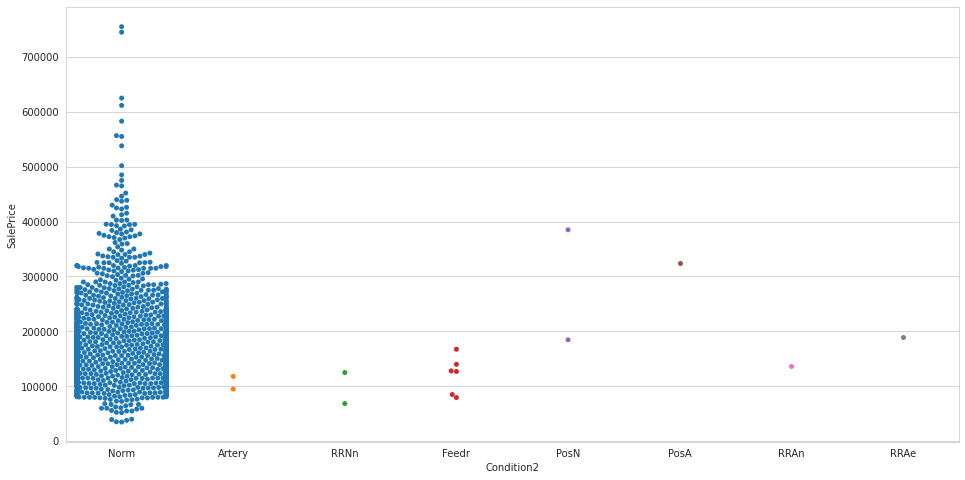

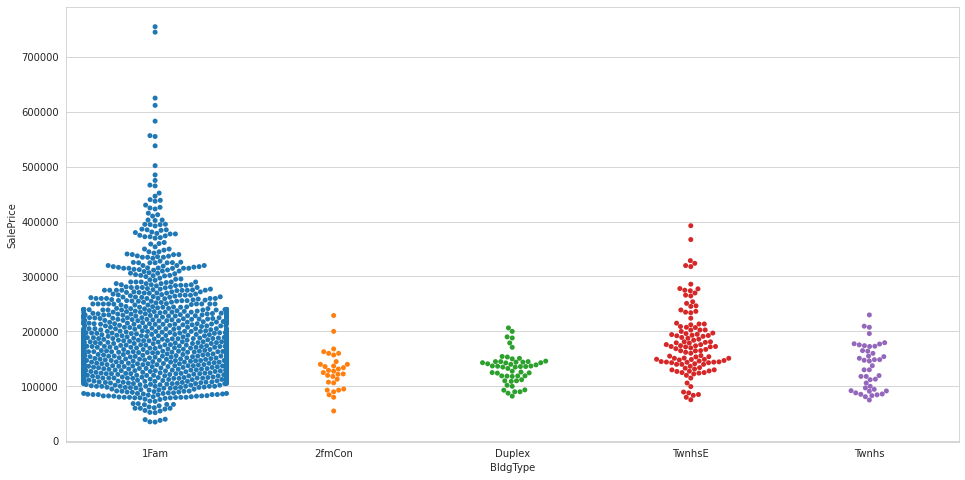

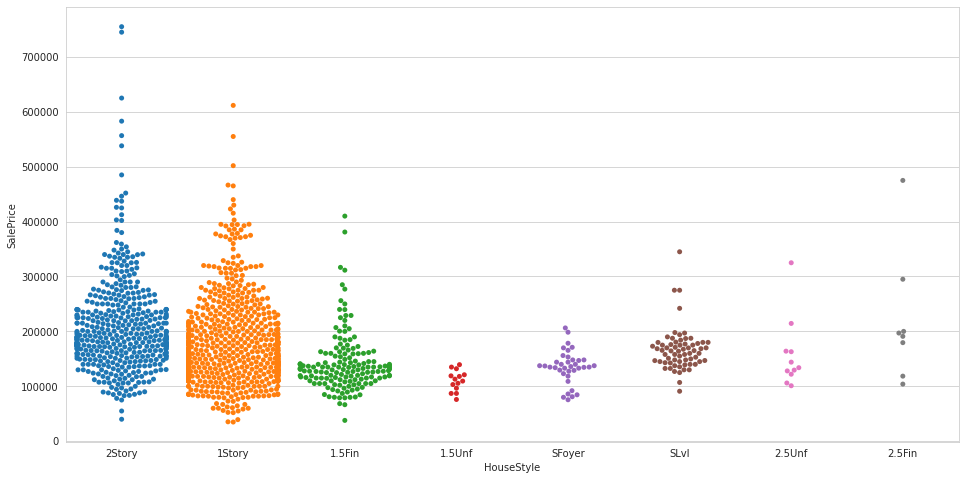

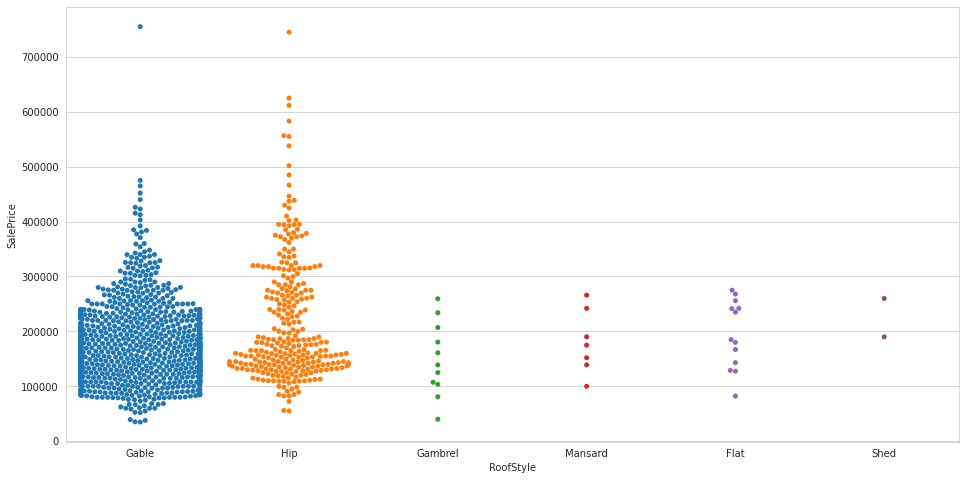

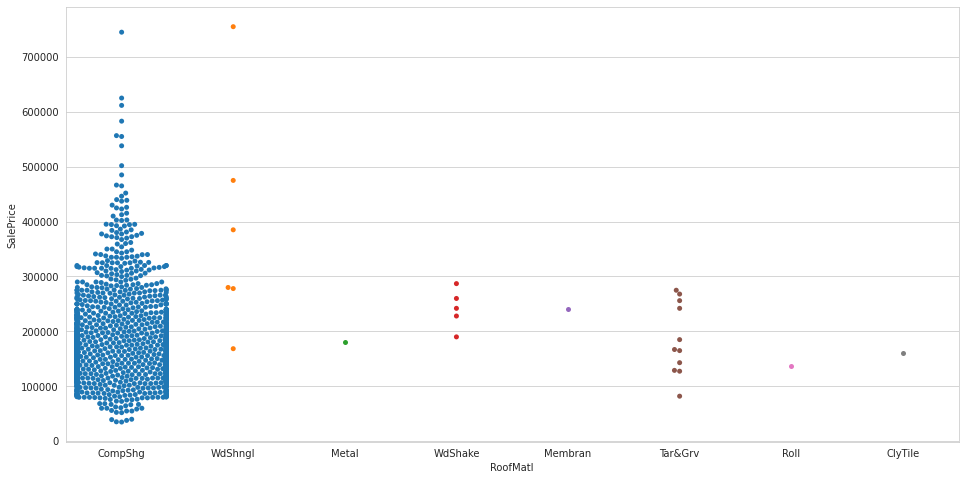

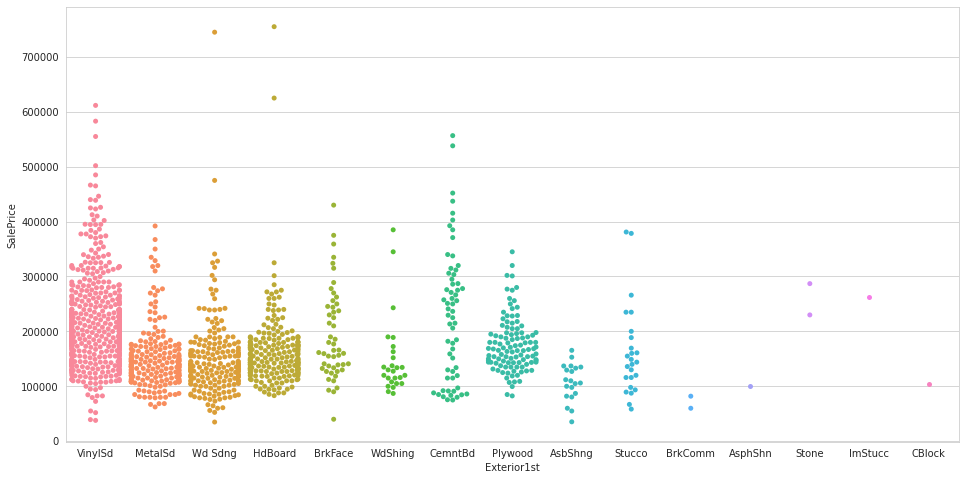

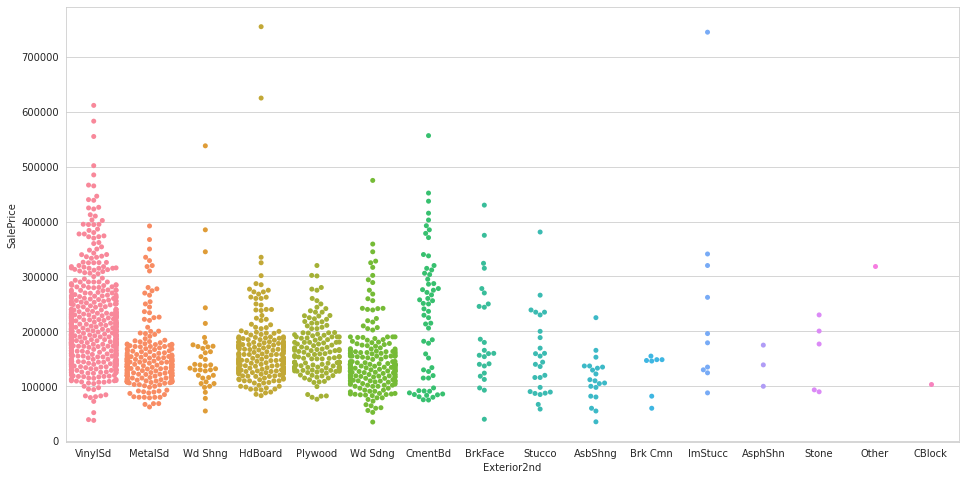

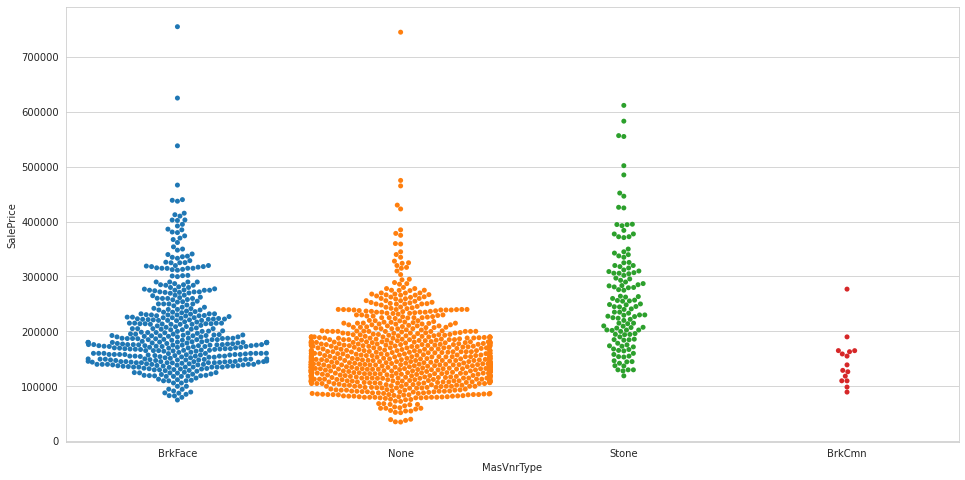

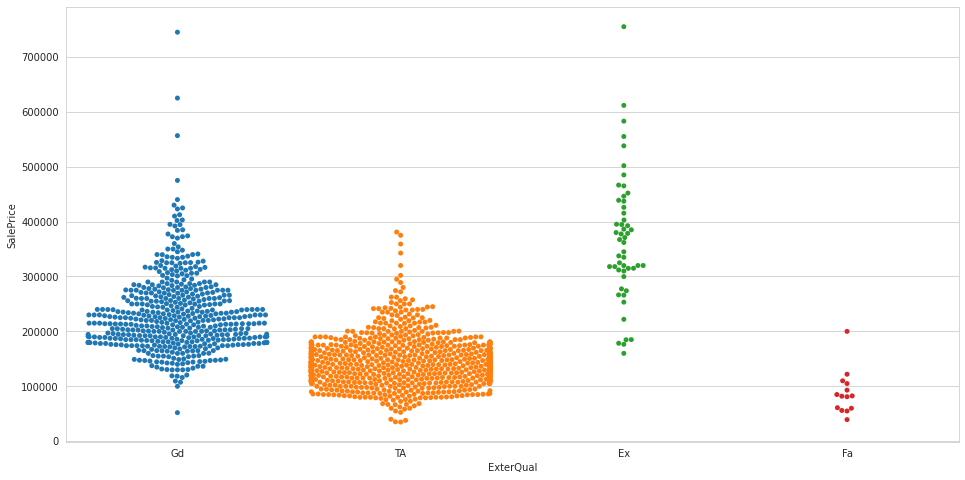

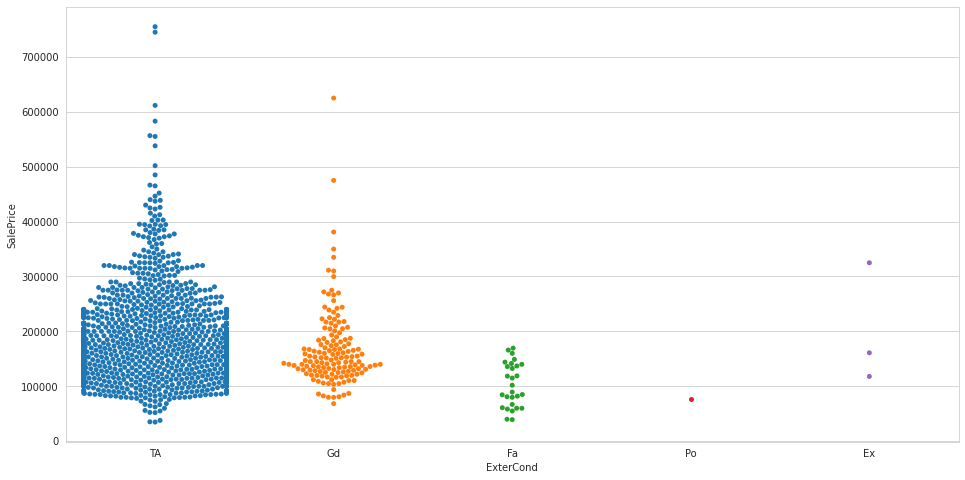

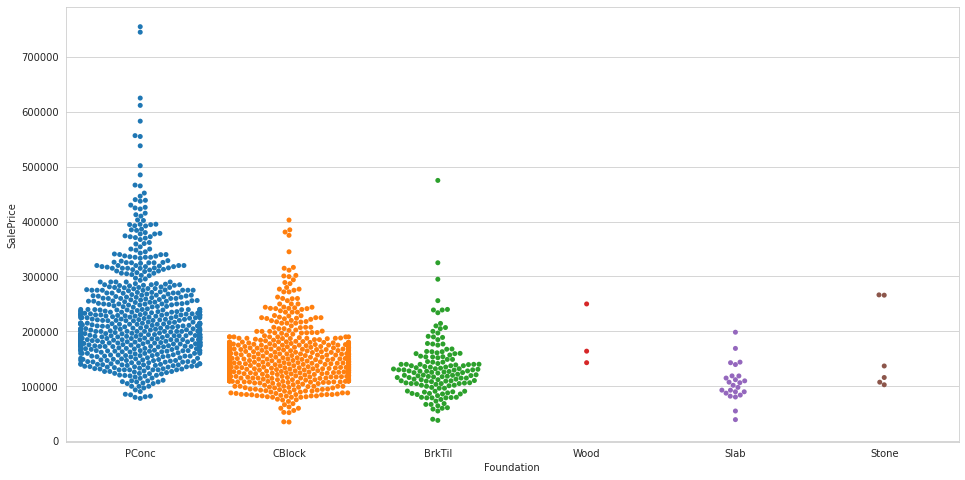

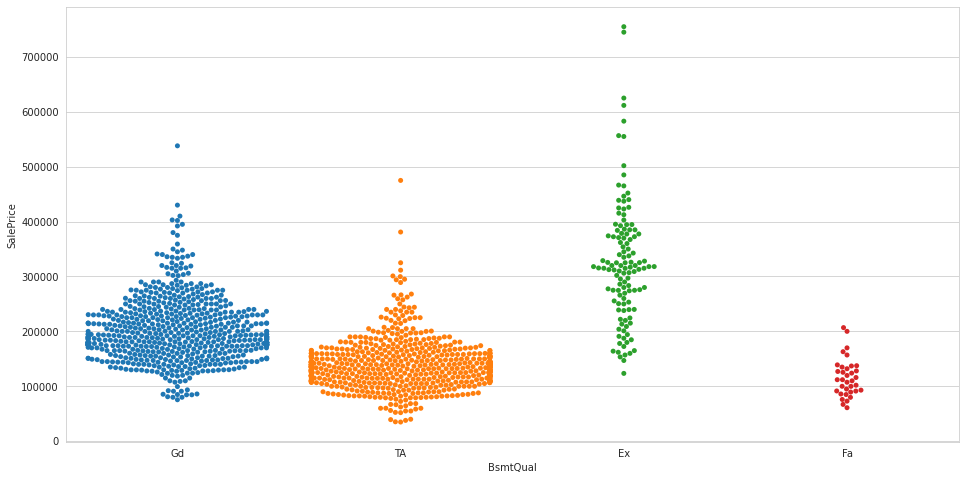

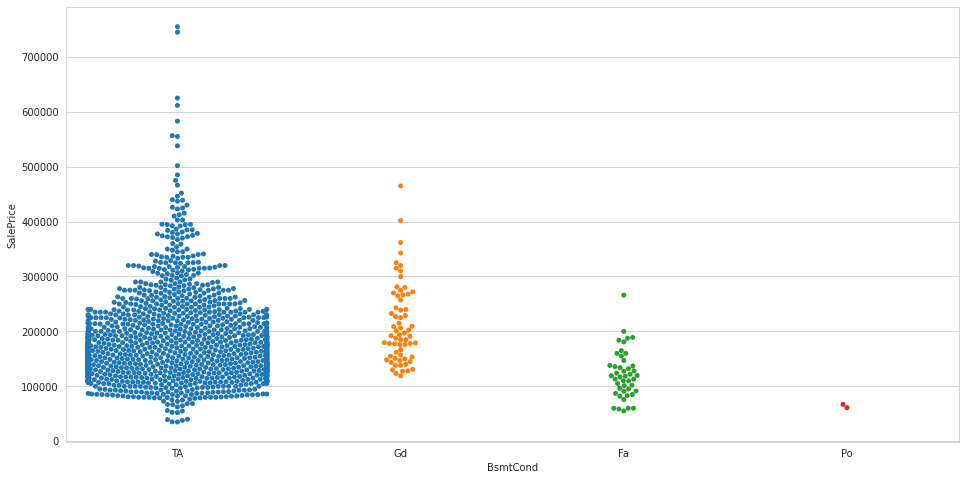

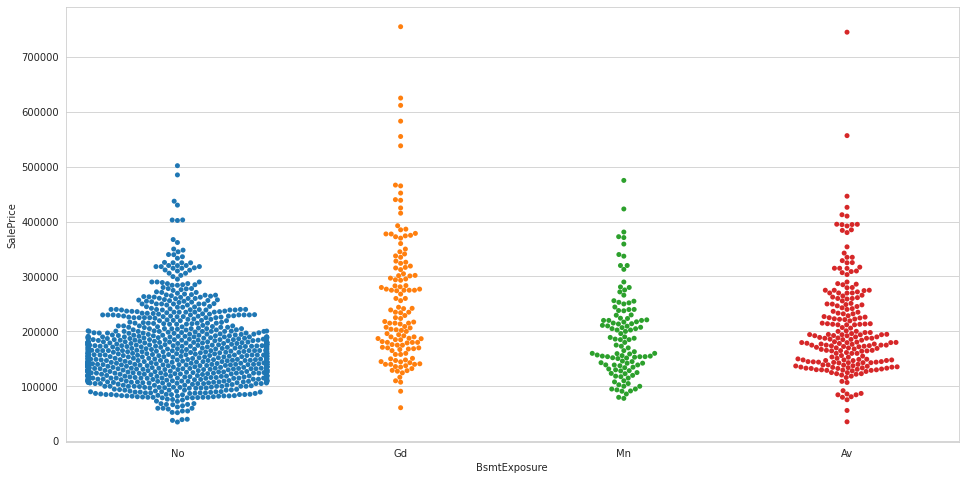

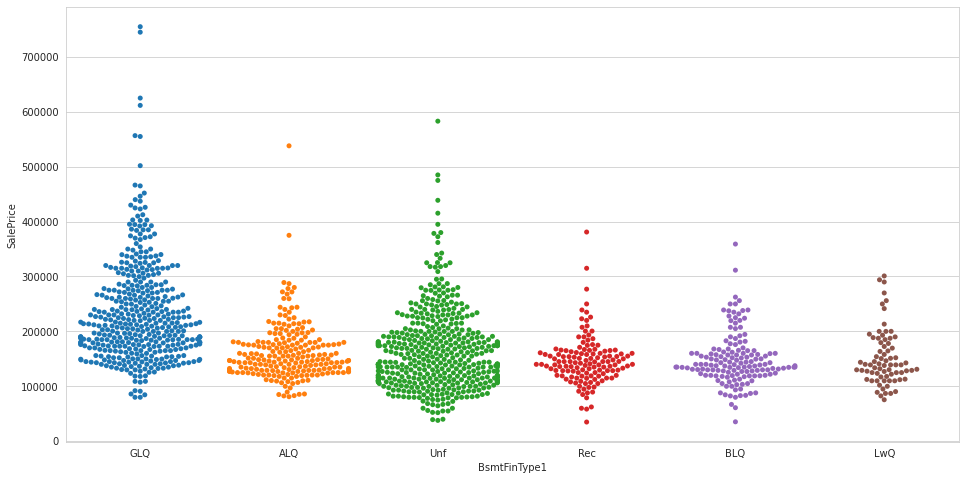

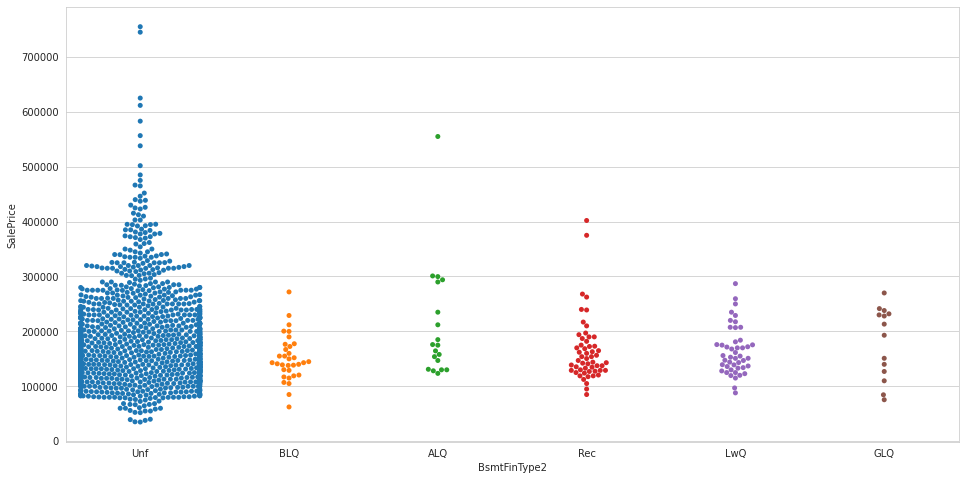

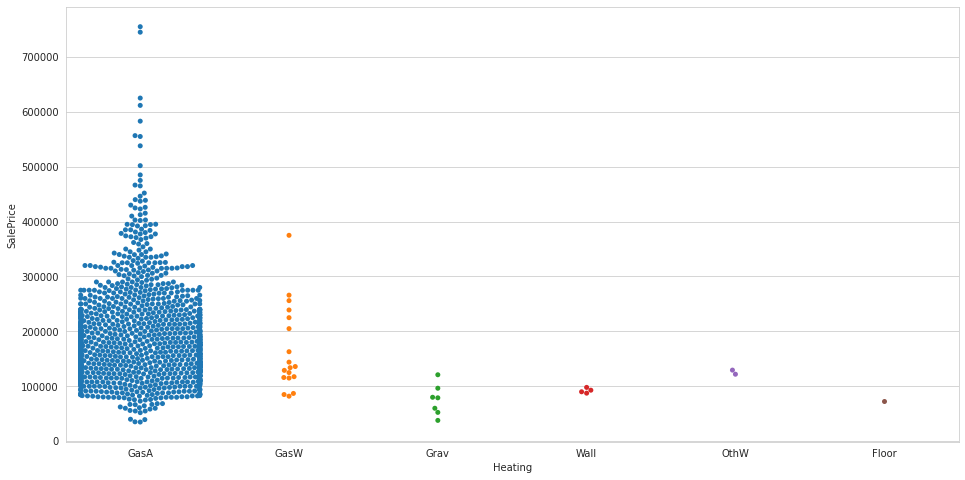

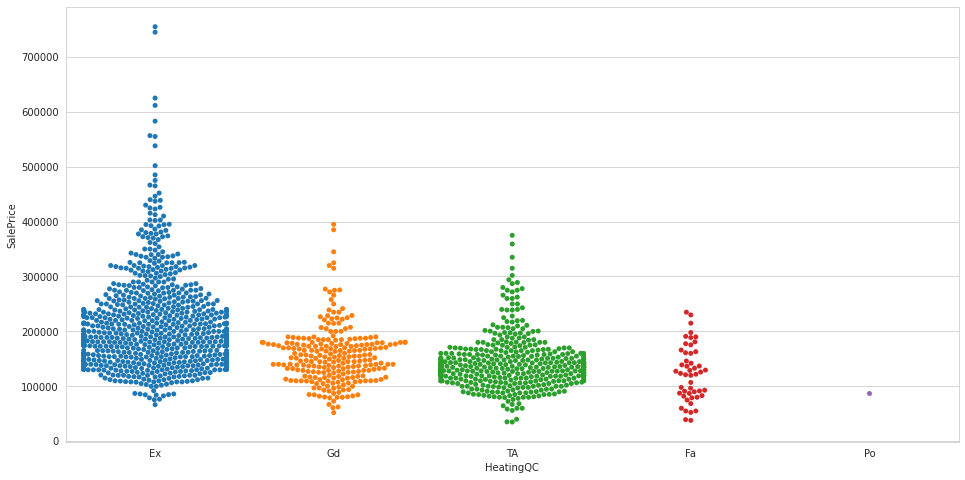

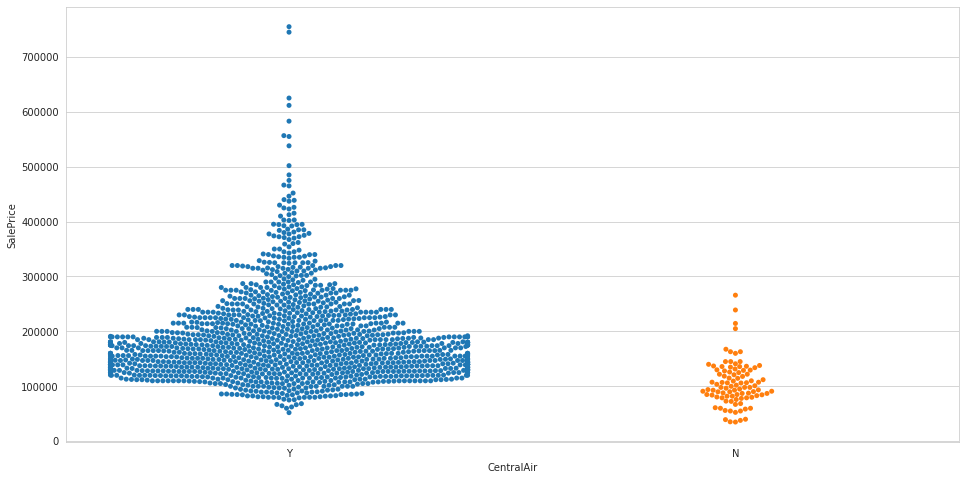

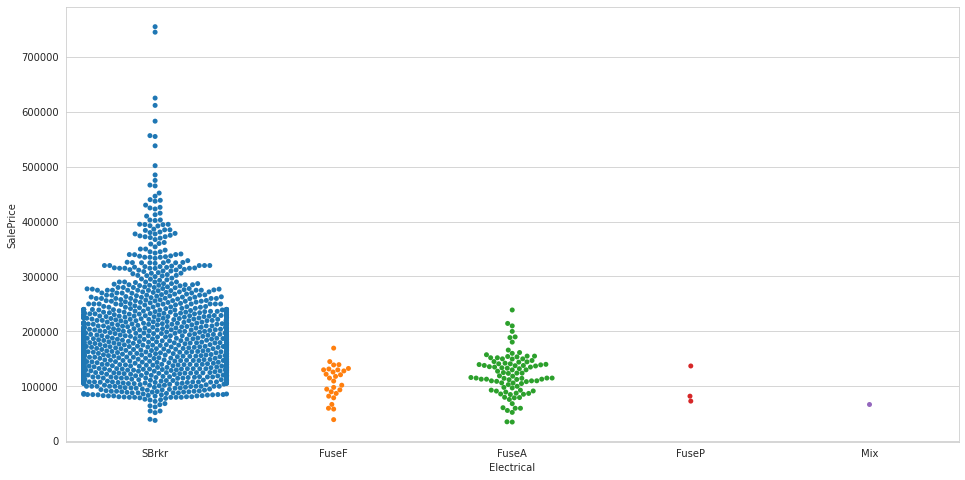

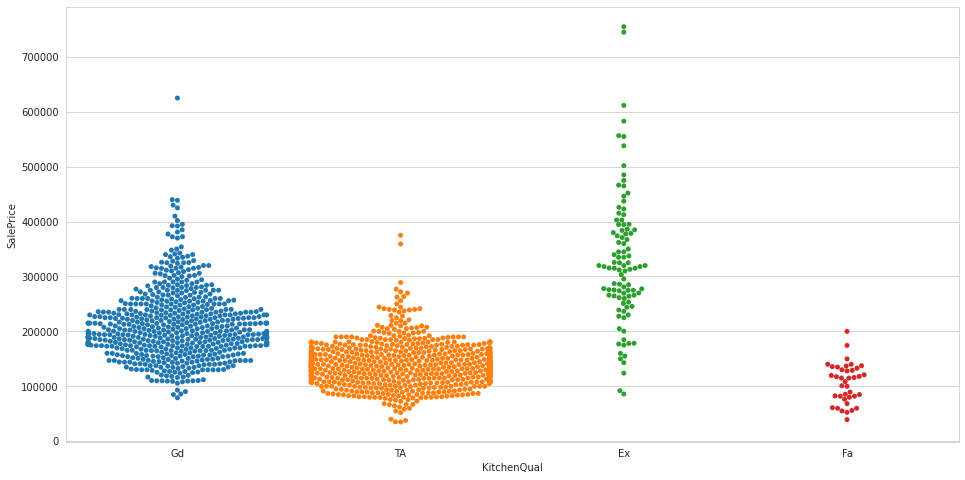

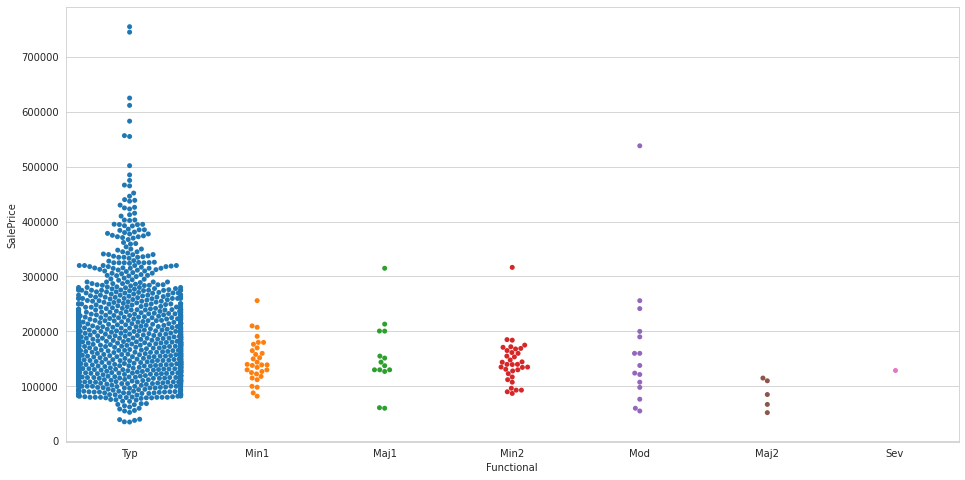

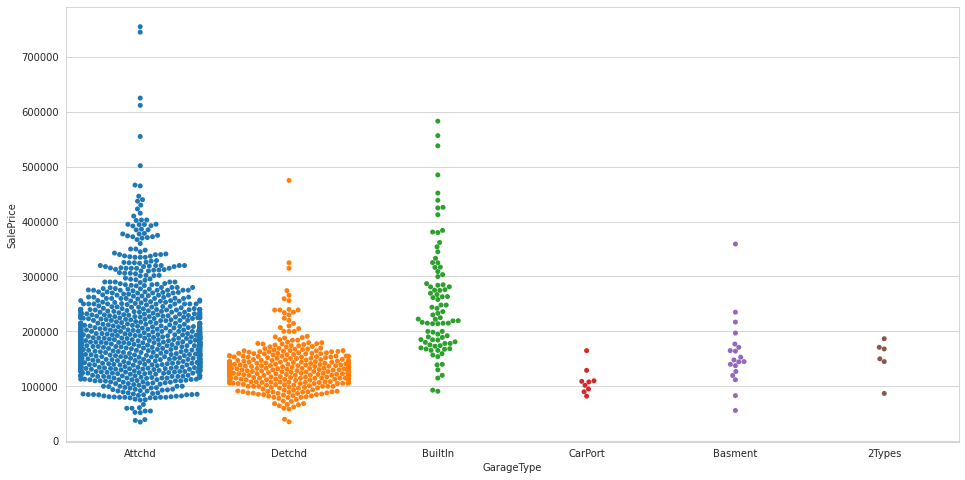

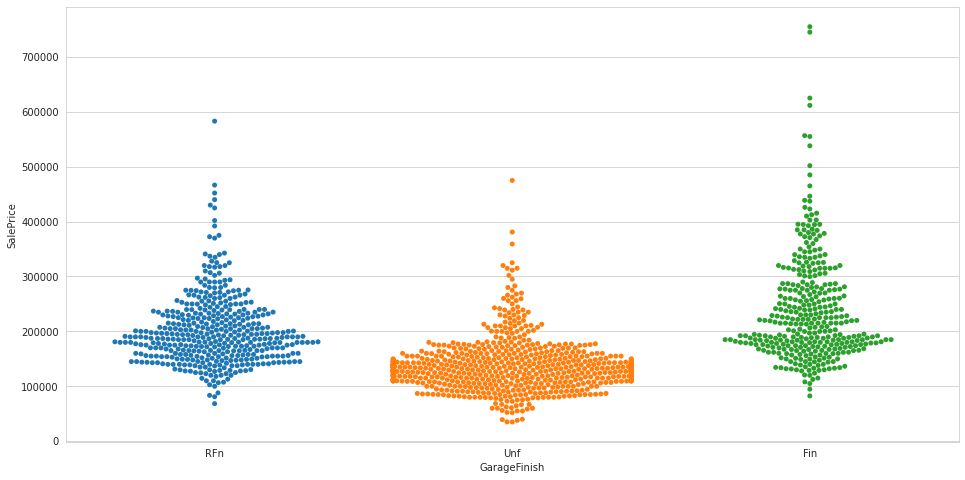

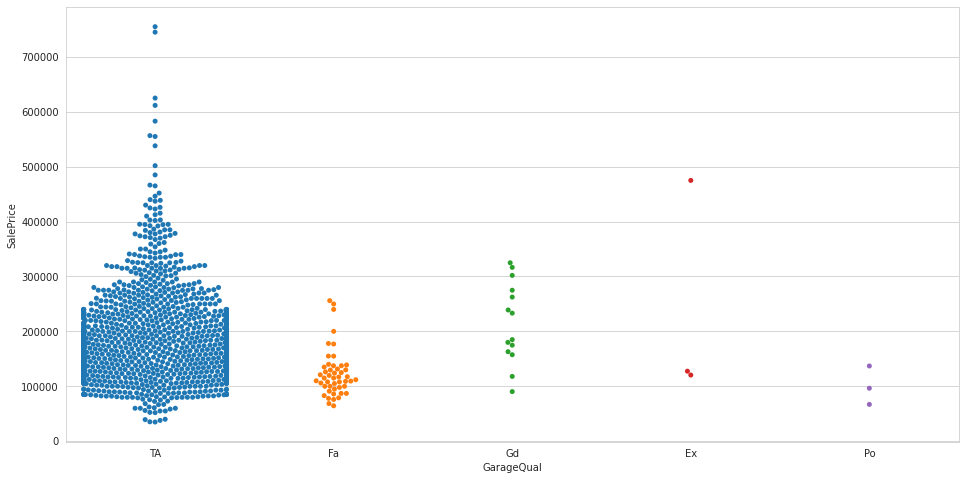

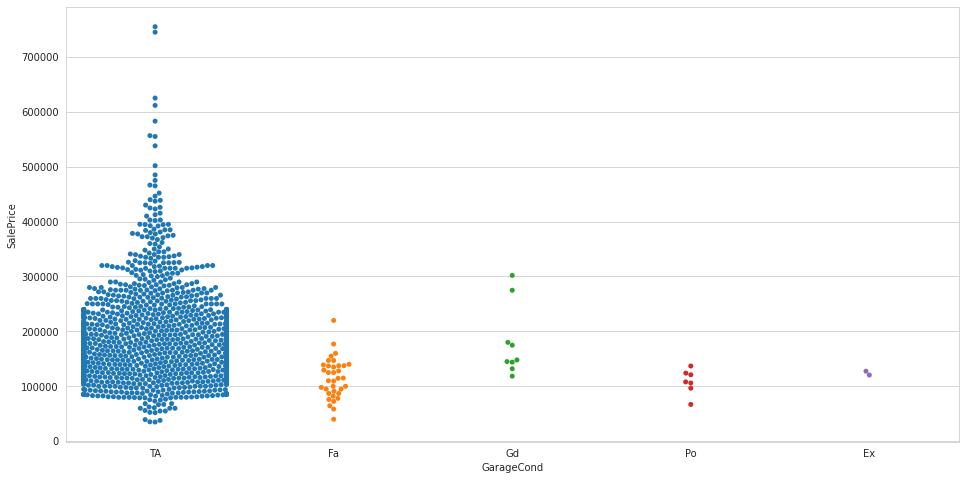

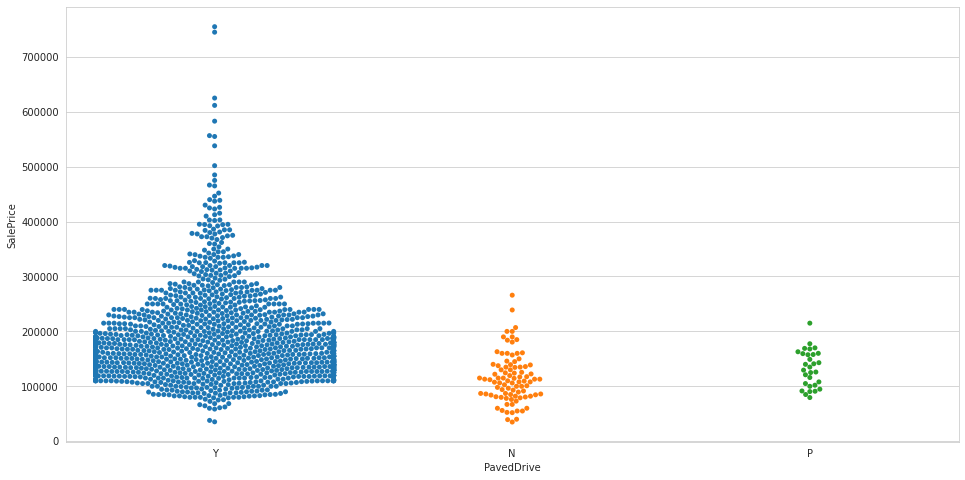

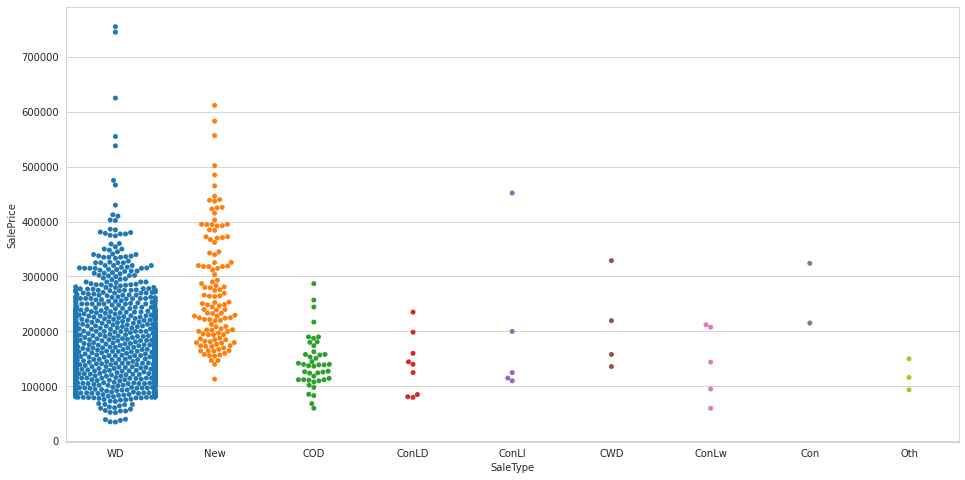

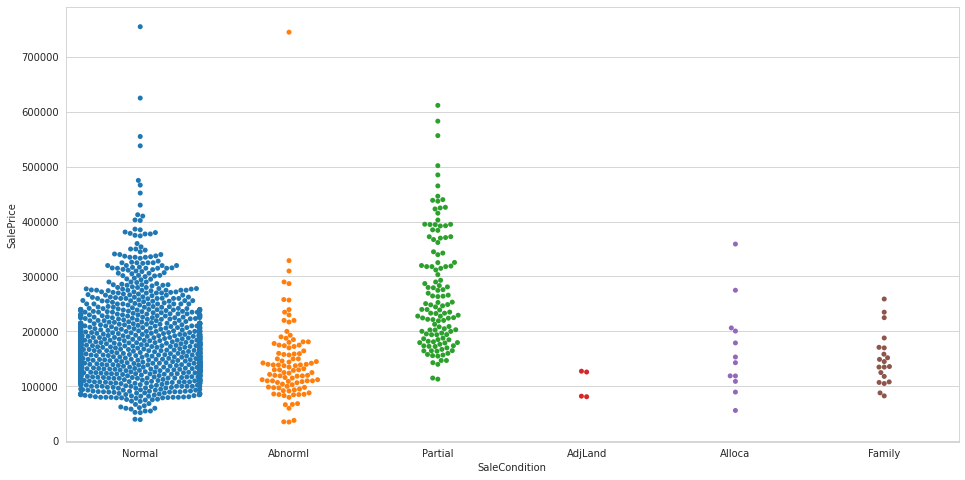

In [ ]:
# Check the distribution of values in the categorical columns around the target valriable
for col in categorical_columns:
  plt.figure(figsize=(16,8))
  sns.swarmplot(data = df, x = col, y='SalePrice')
  plt.show()
  print('\n')

In [ ]:
# As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns
df.Utilities.value_counts()
df = df.drop(['Street','Utilities'],axis=1)

categorical_columns = categorical_columns[categorical_columns.map(lambda x: x not in ['Street','Utilities'])]
categorical_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Analyzing Numerical Variables

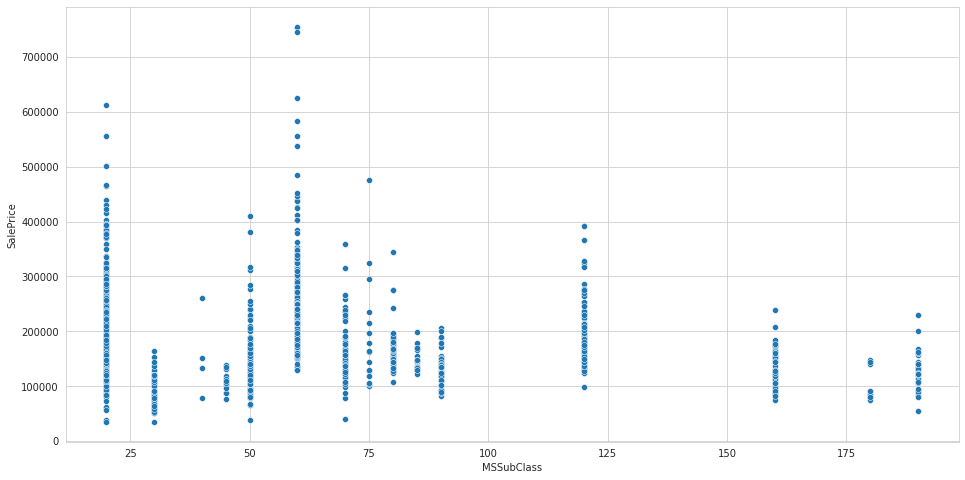

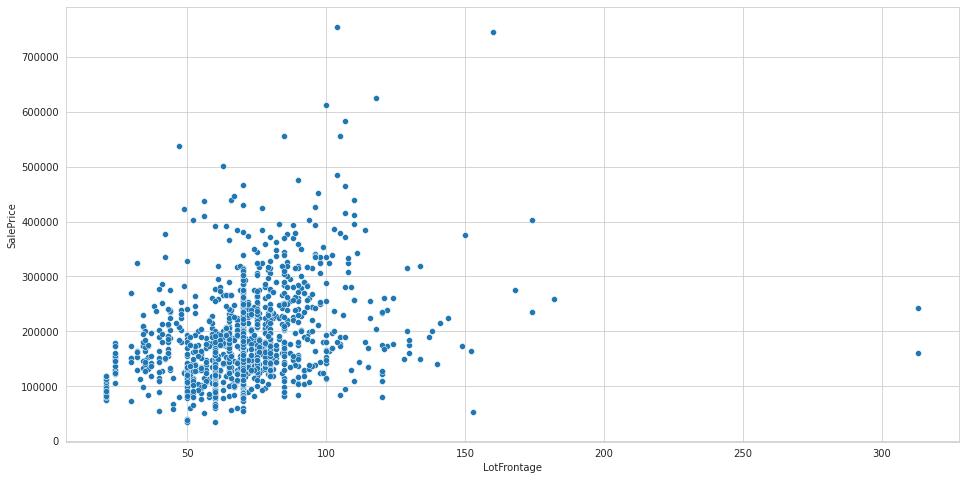

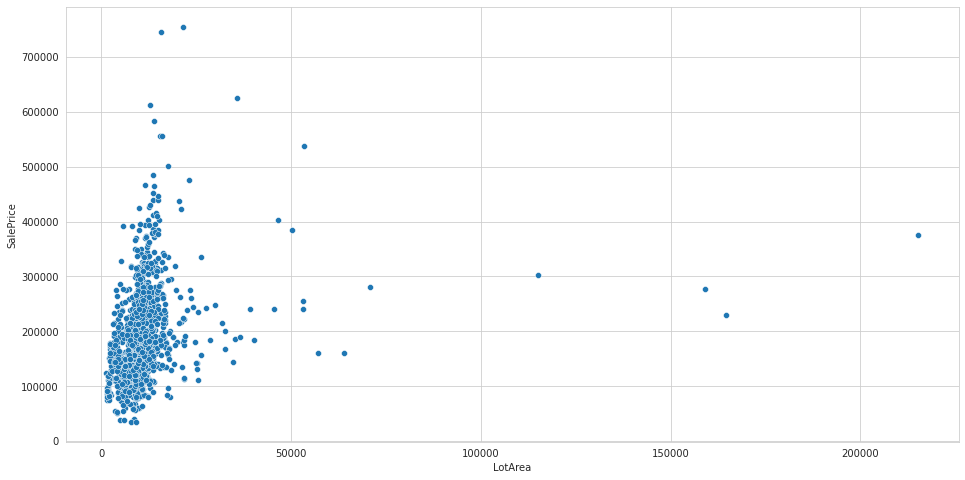

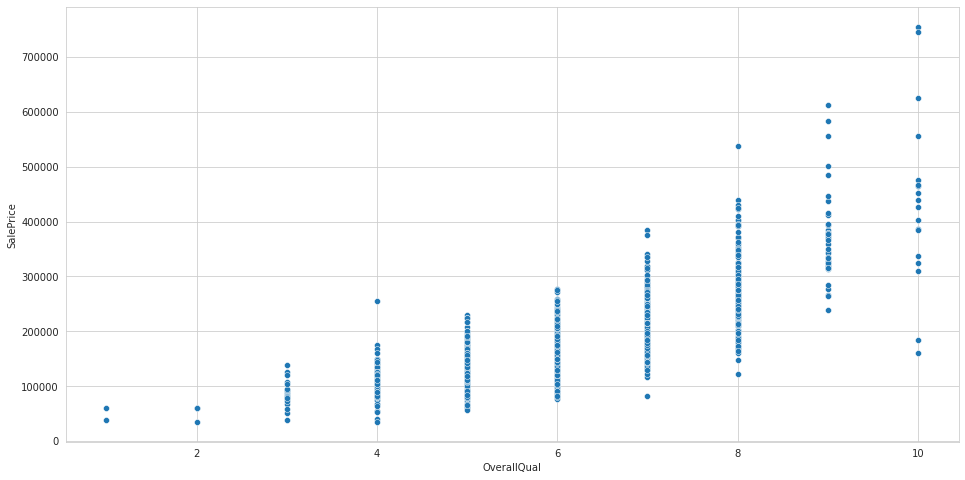

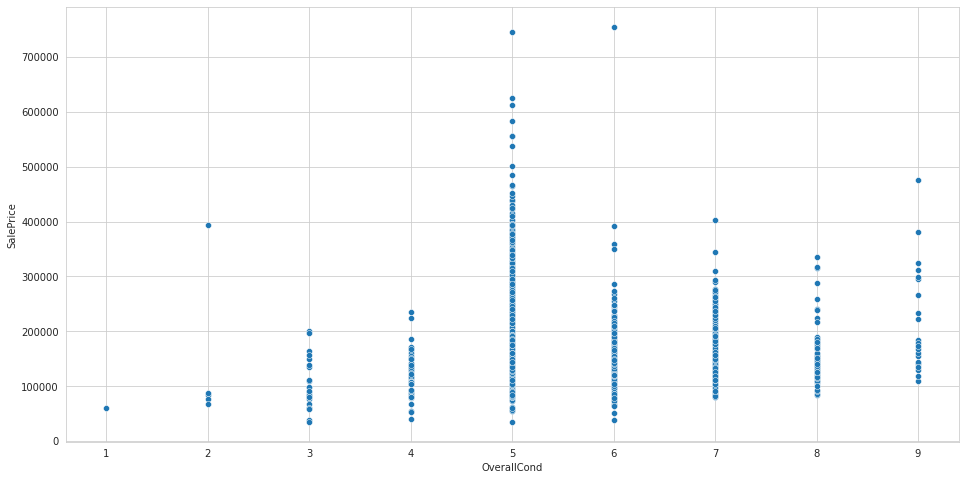

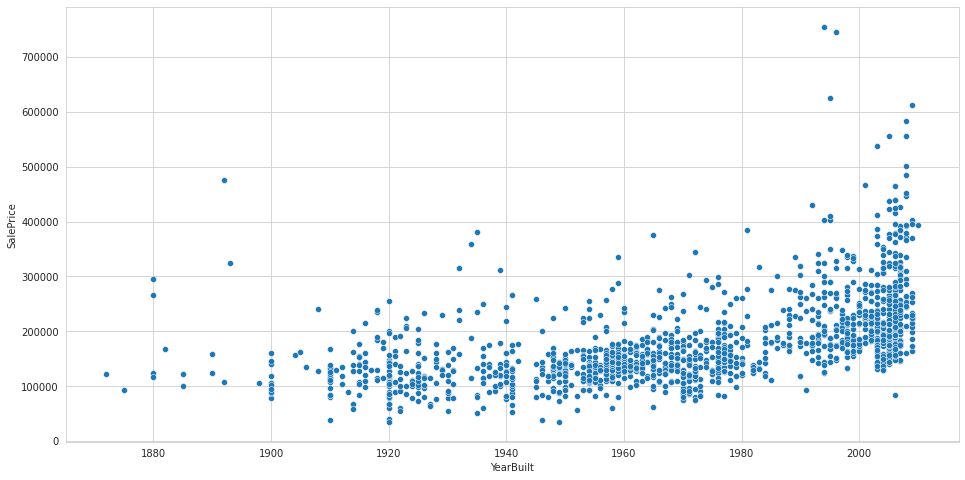

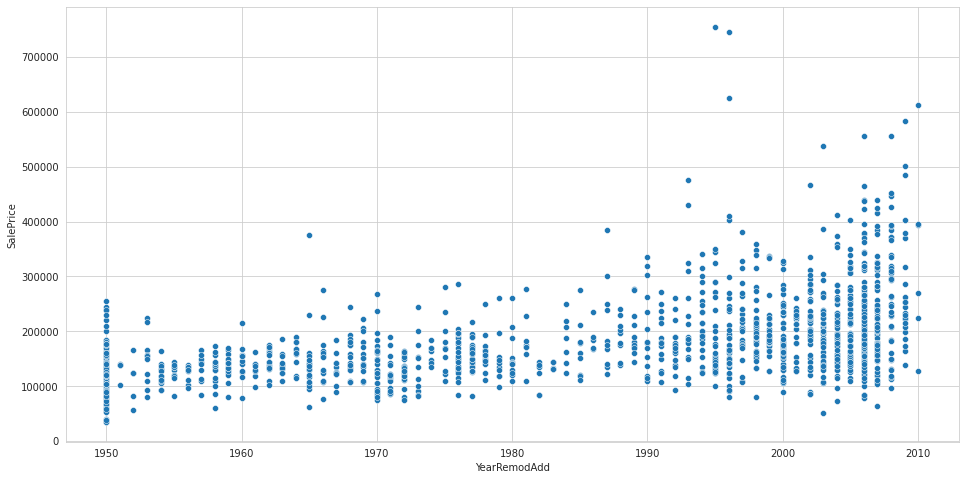

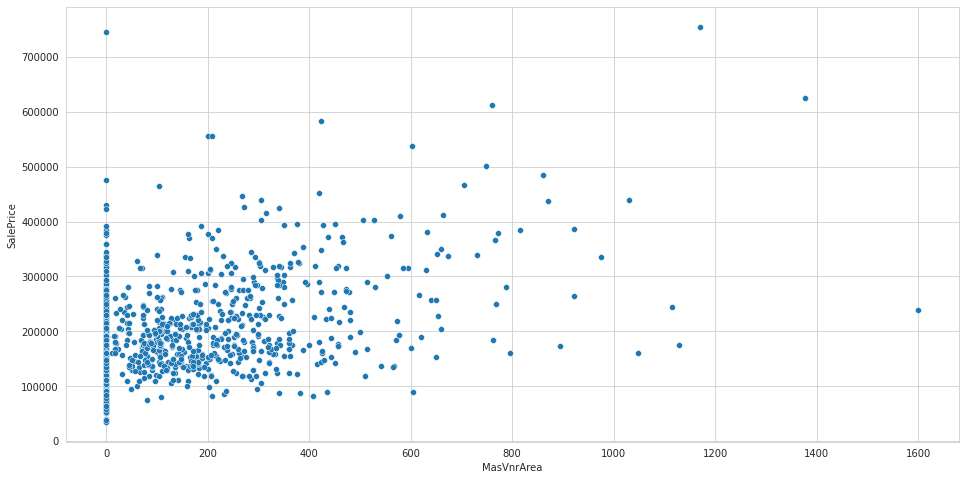

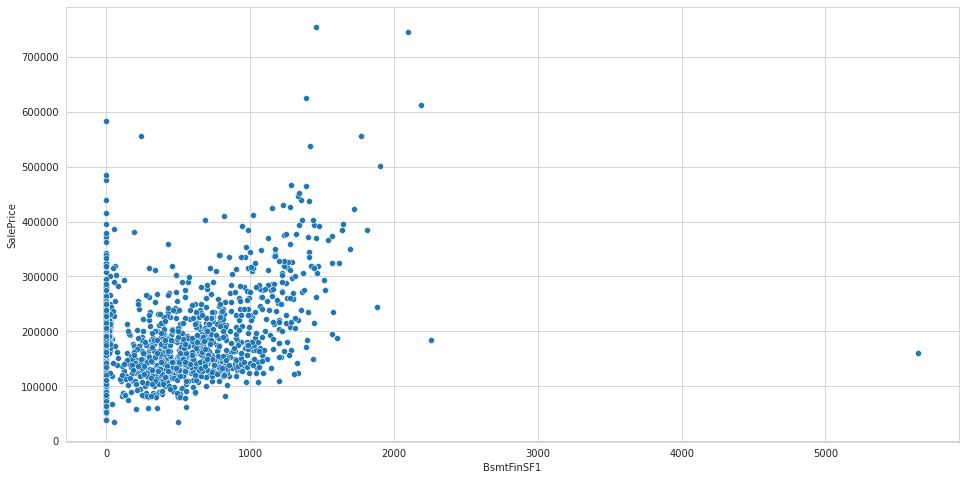

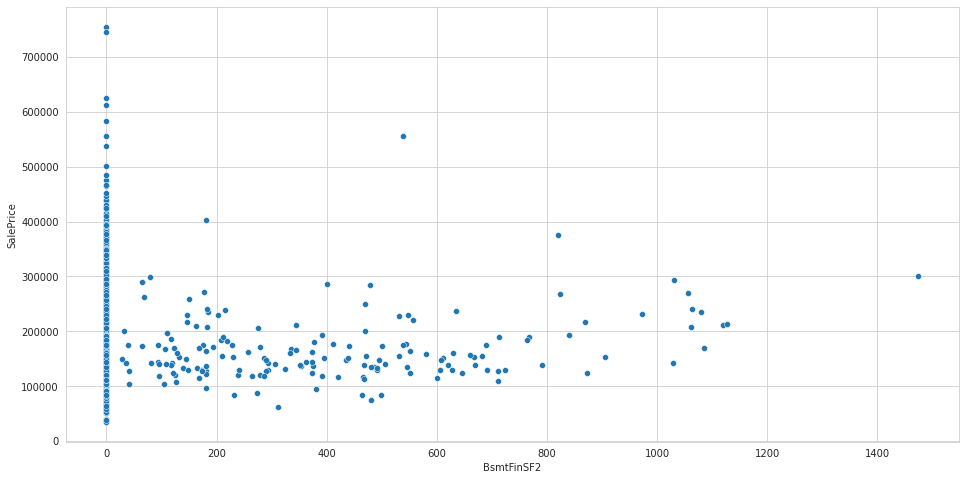

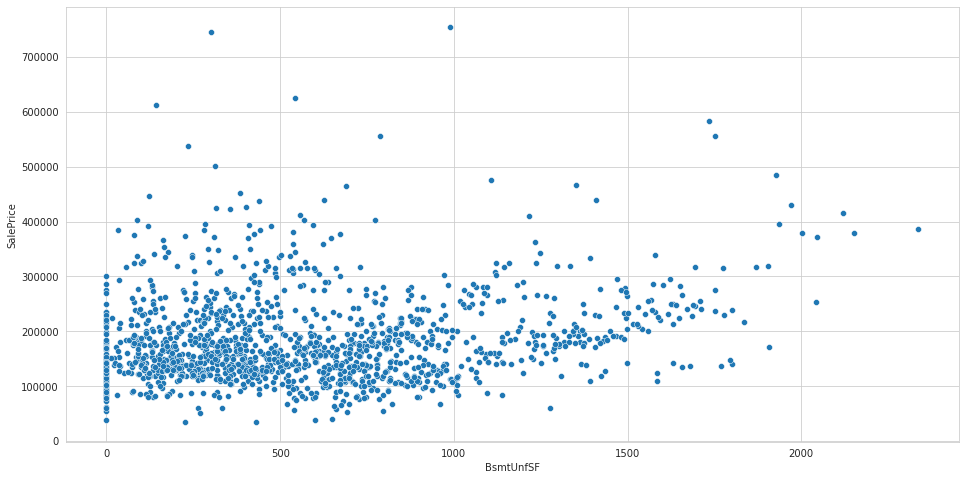

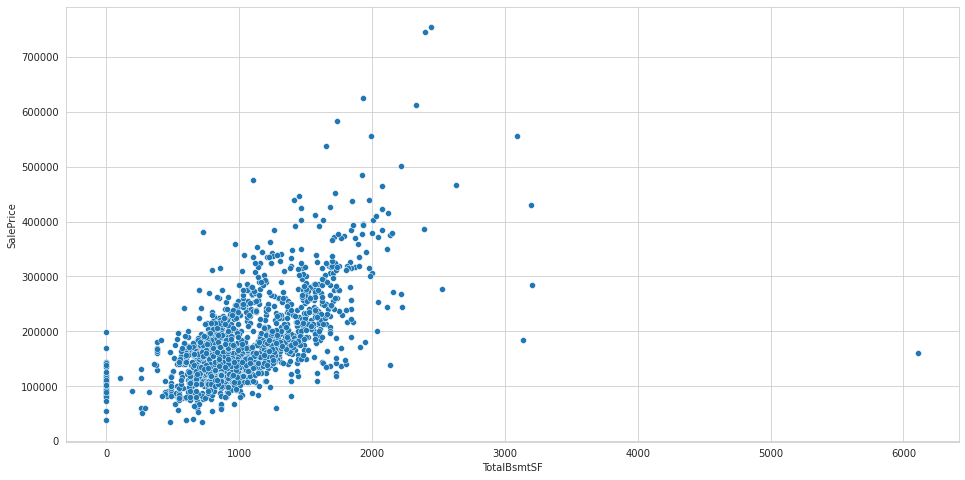

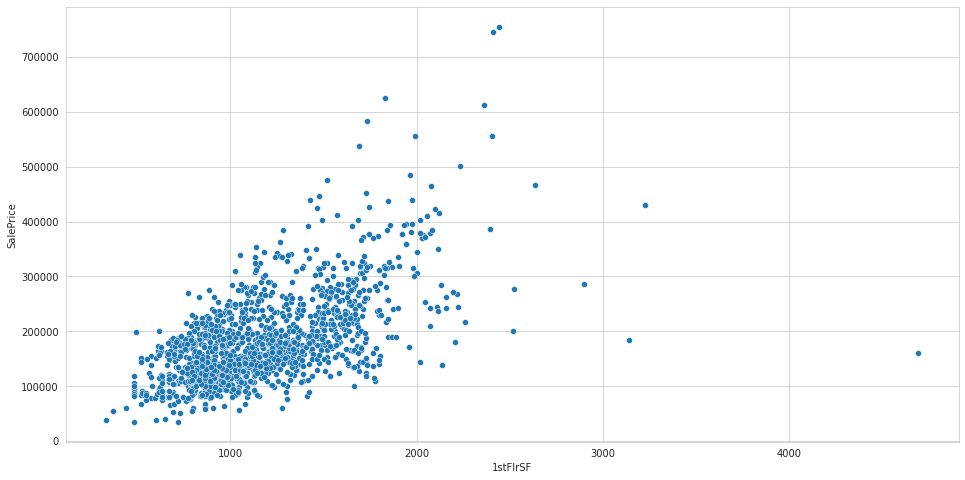

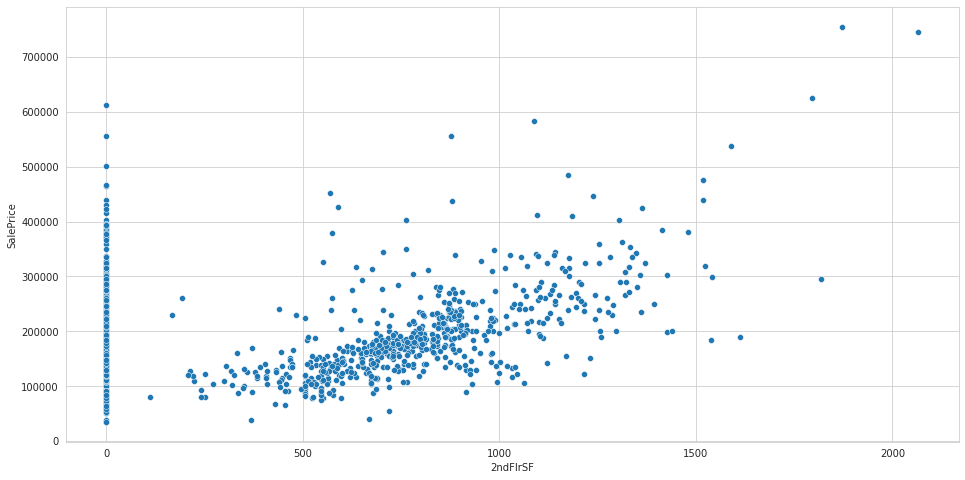

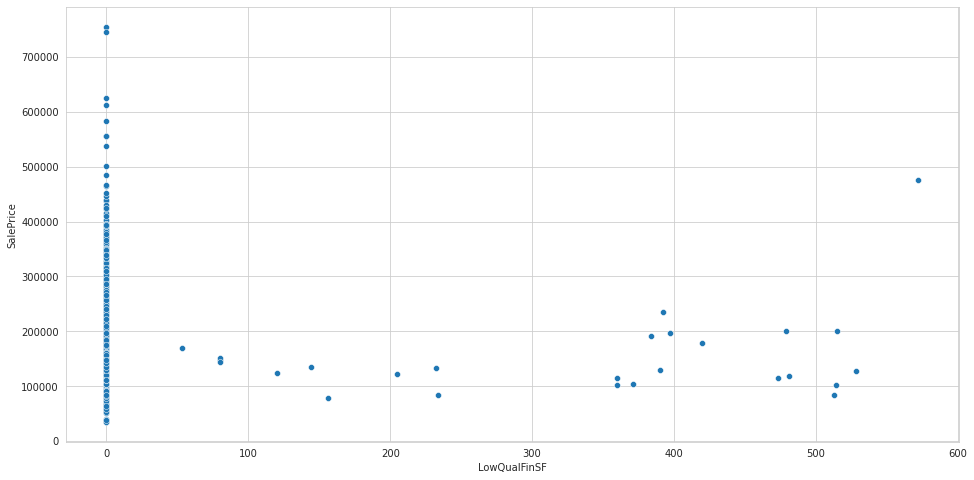

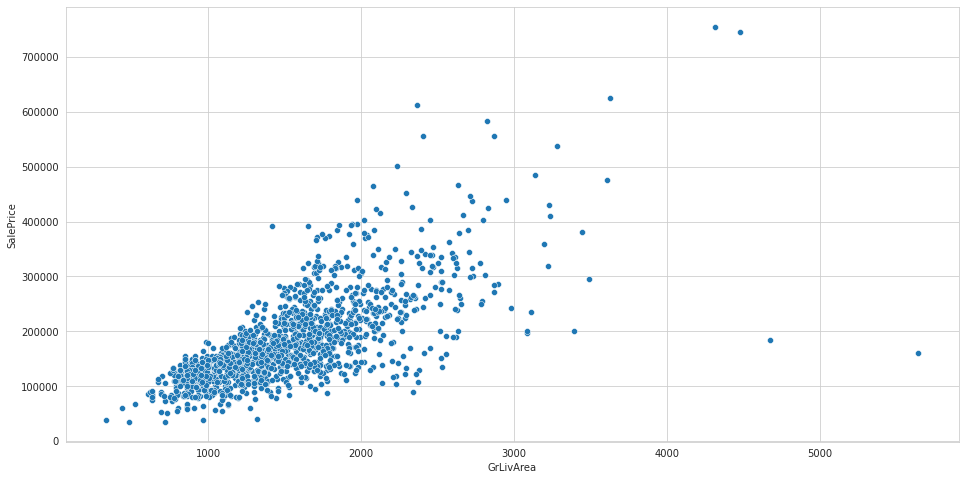

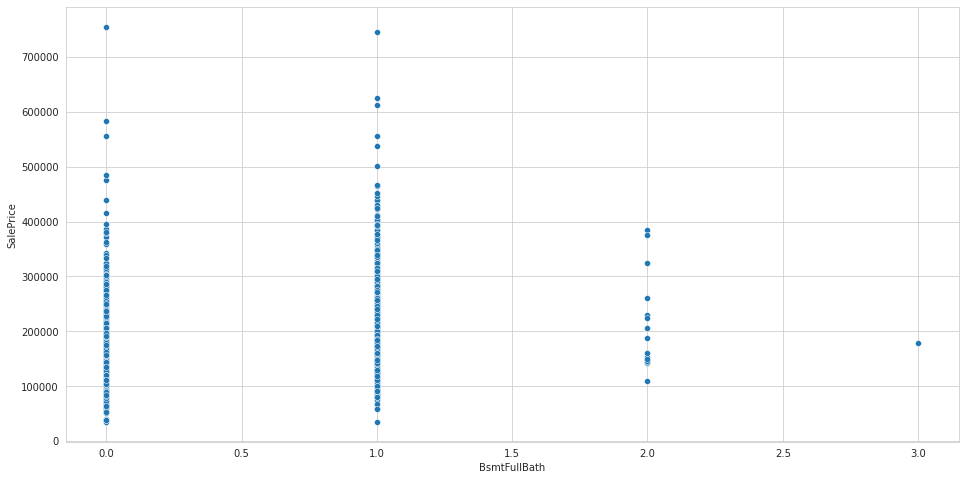

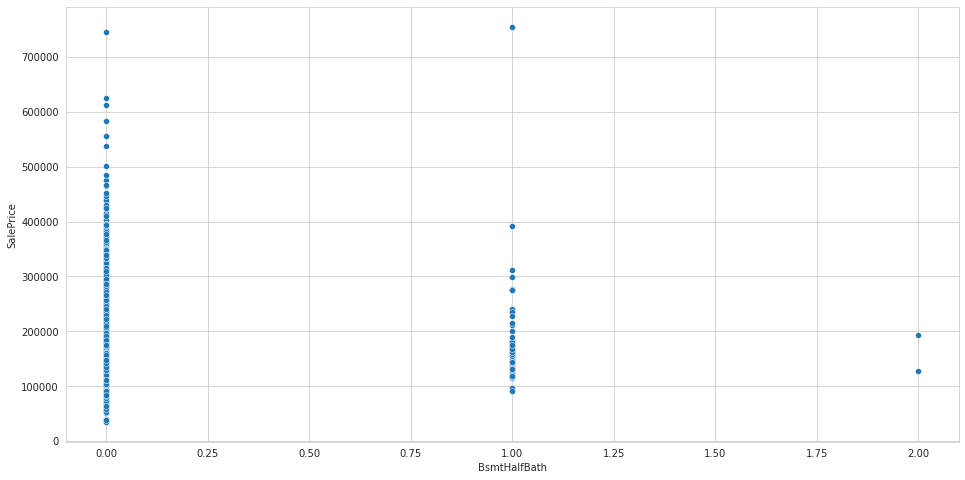

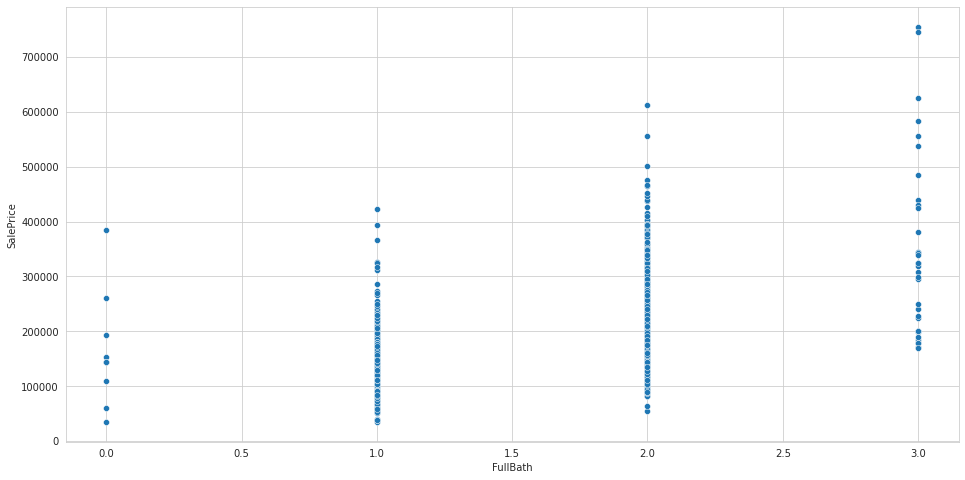

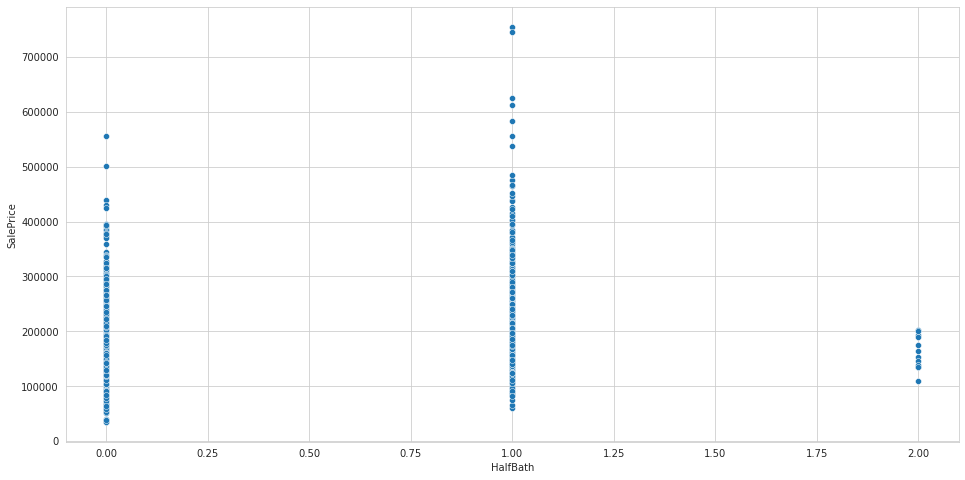

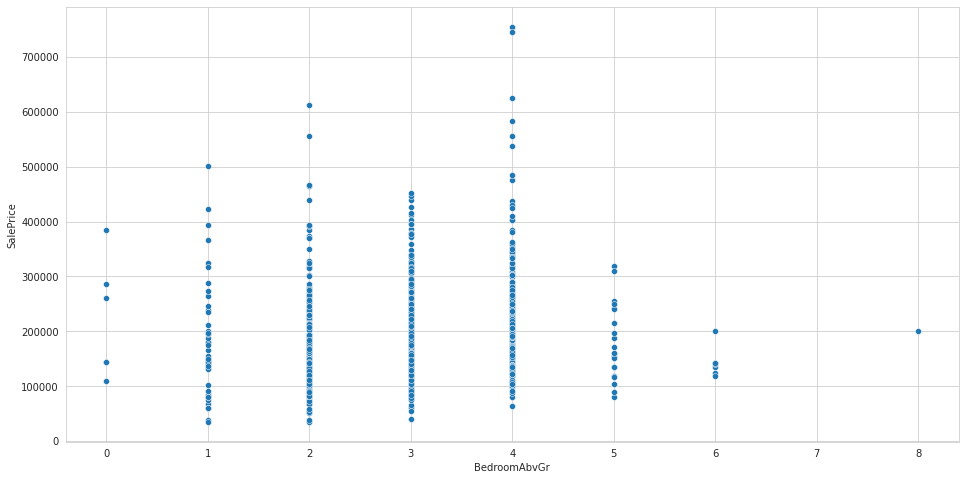

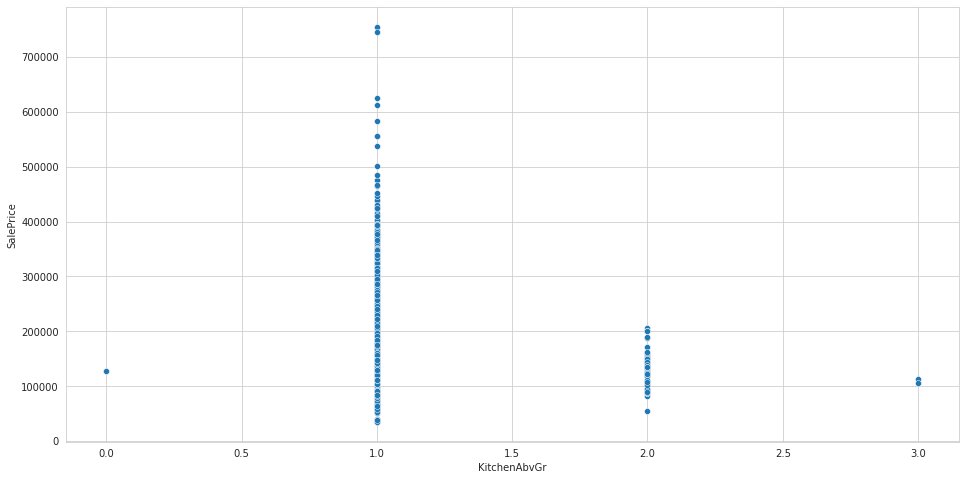

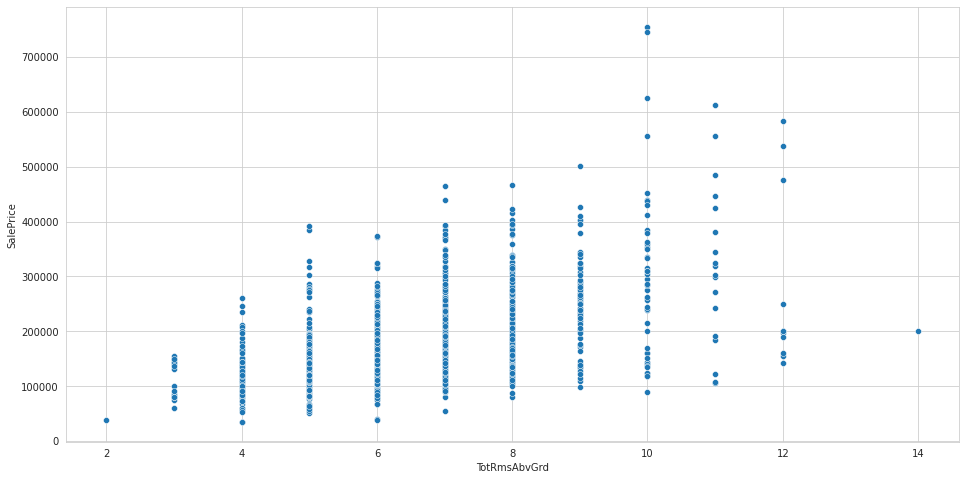

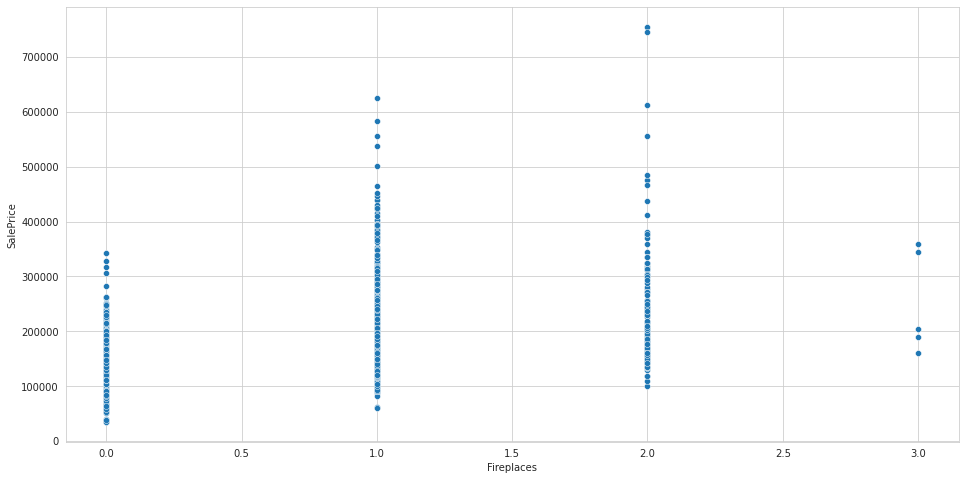

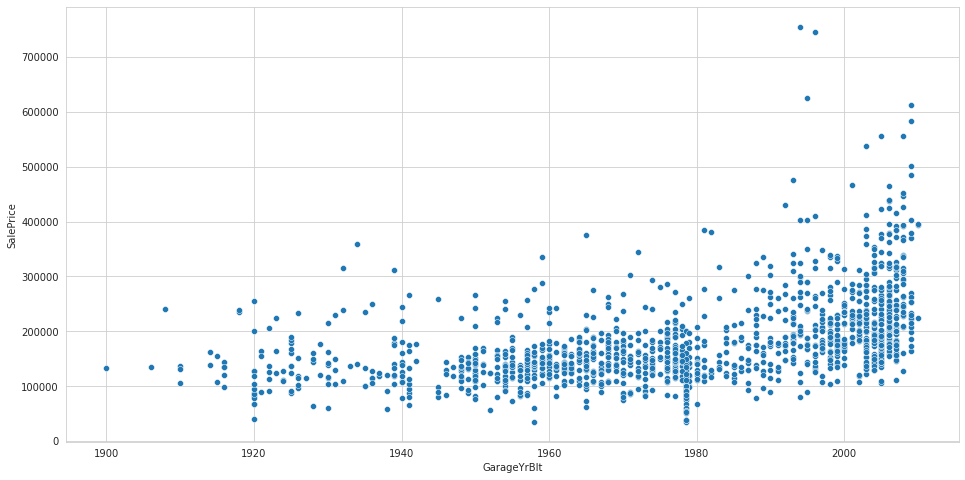

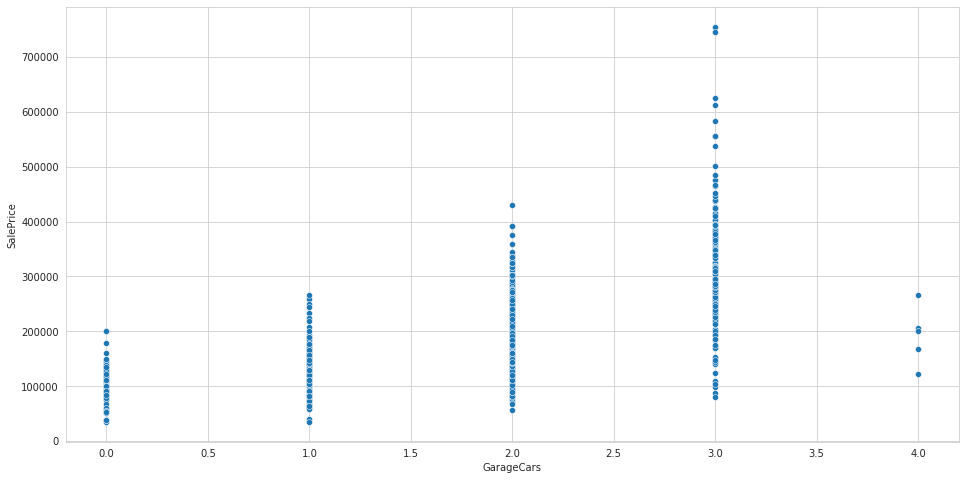

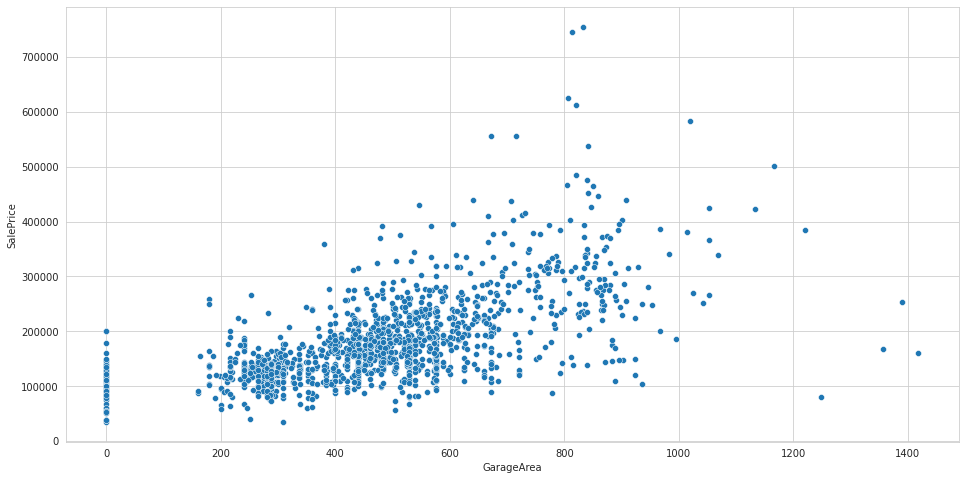

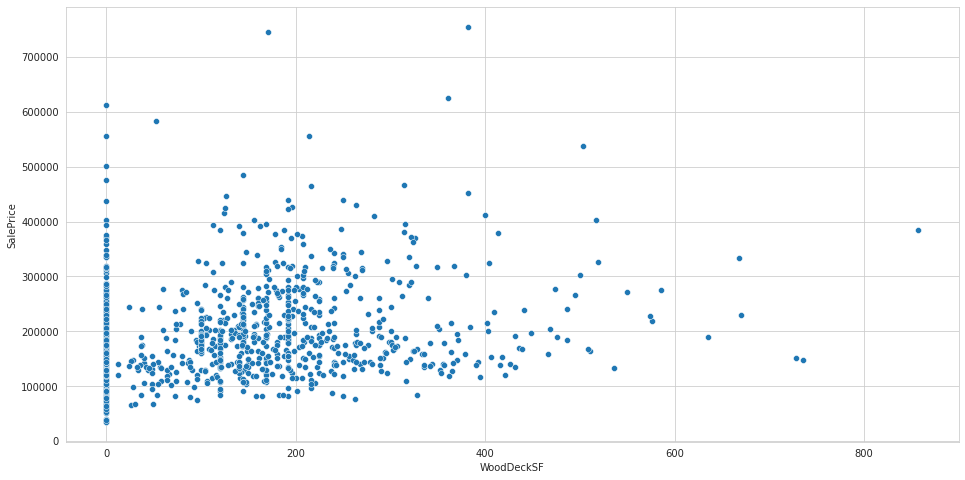

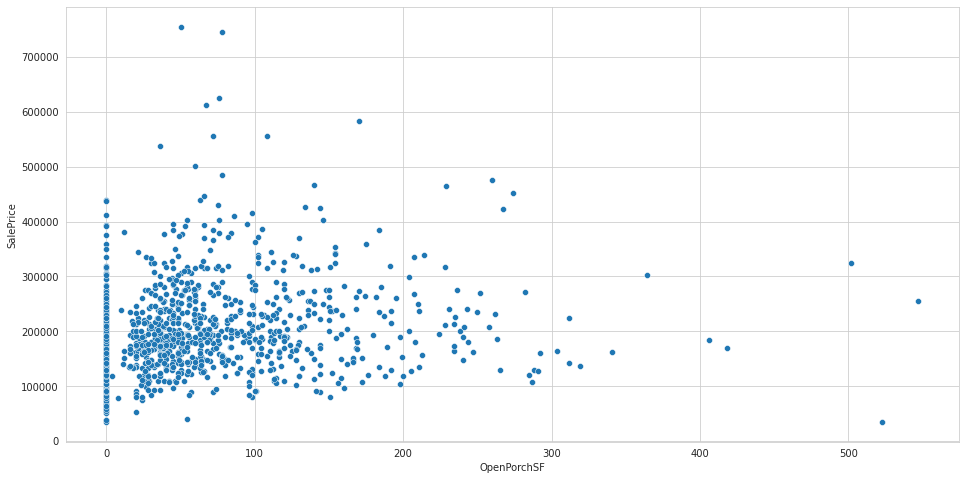

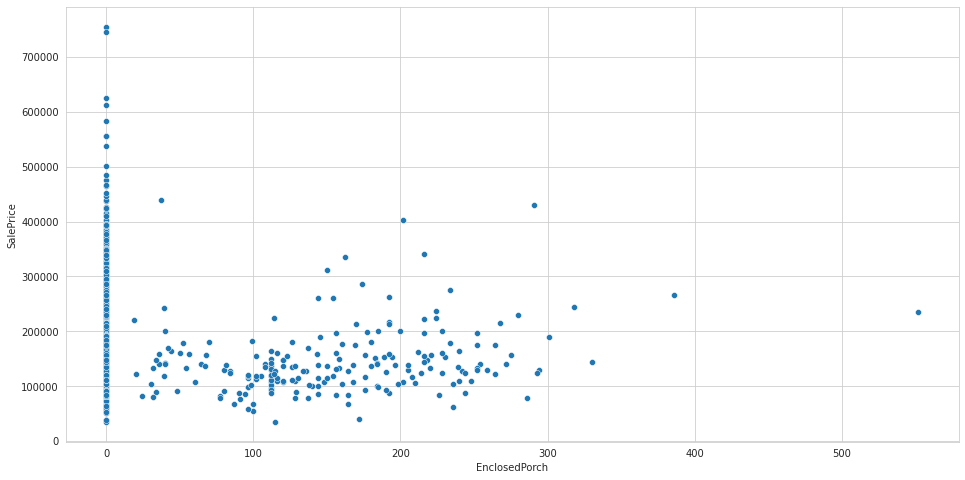

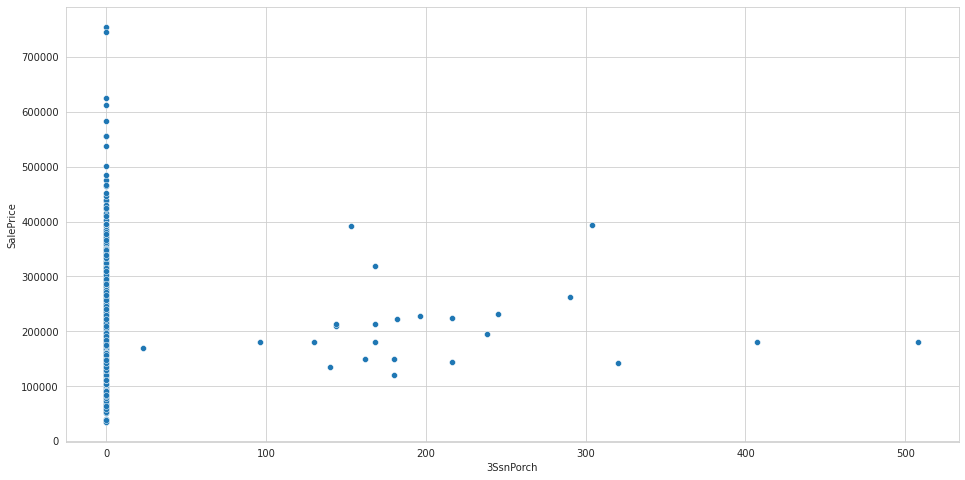

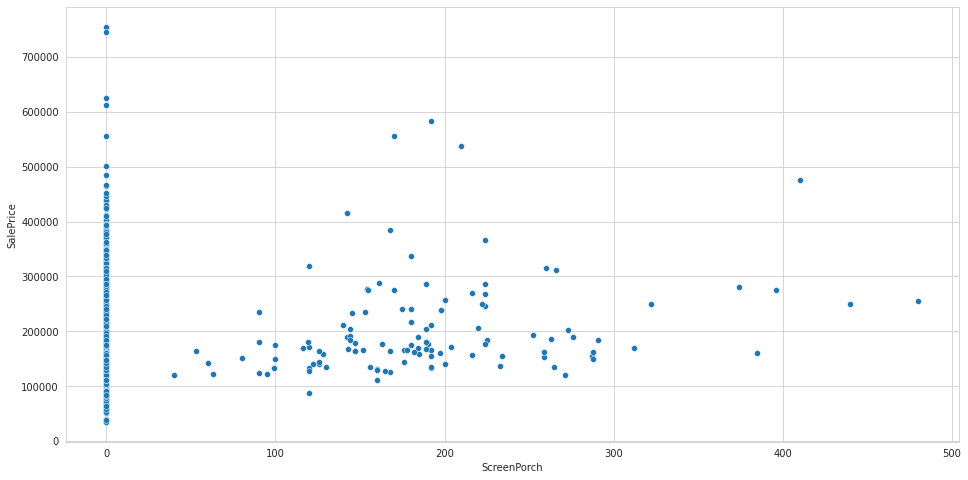

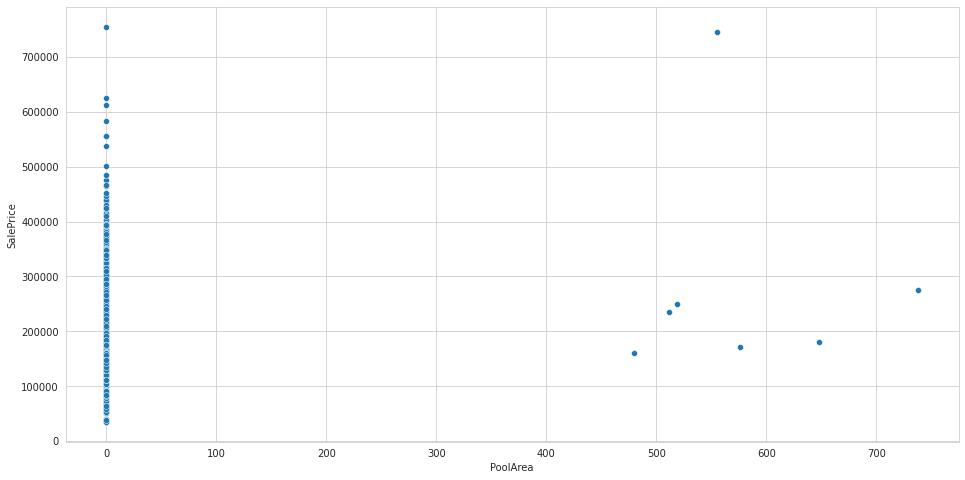

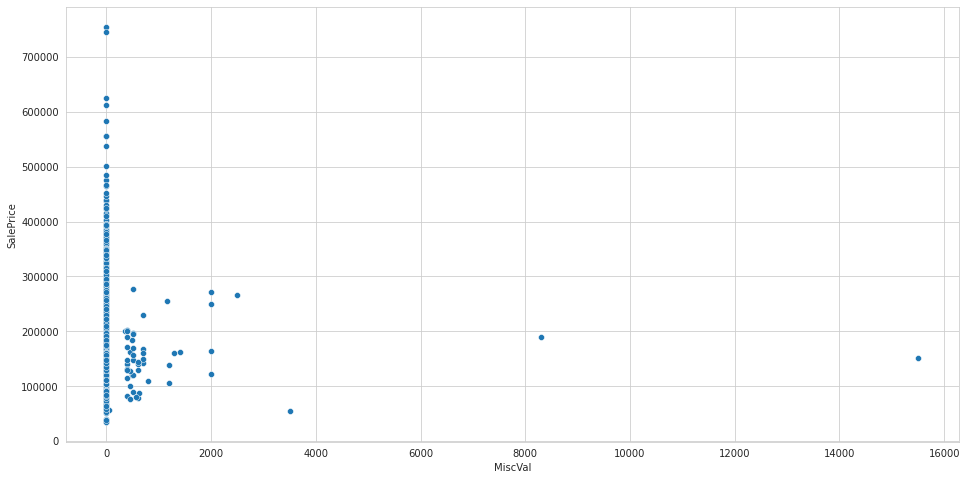

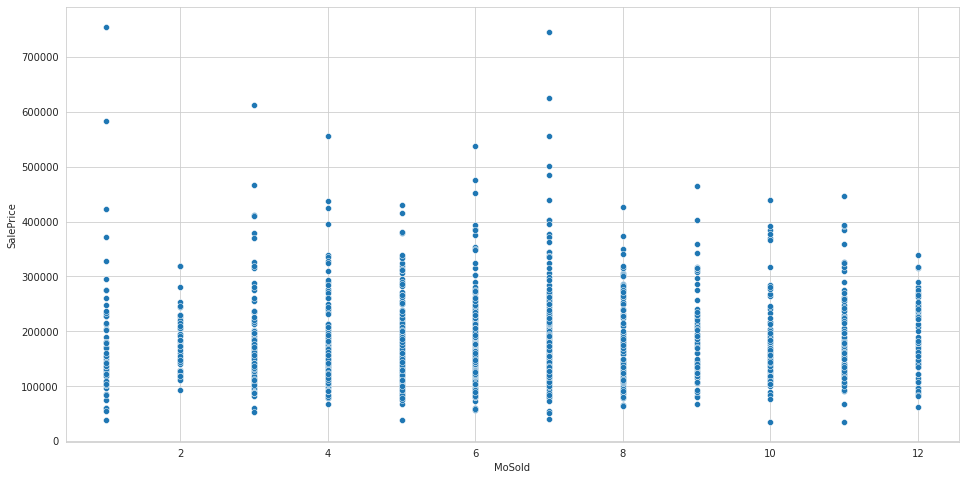

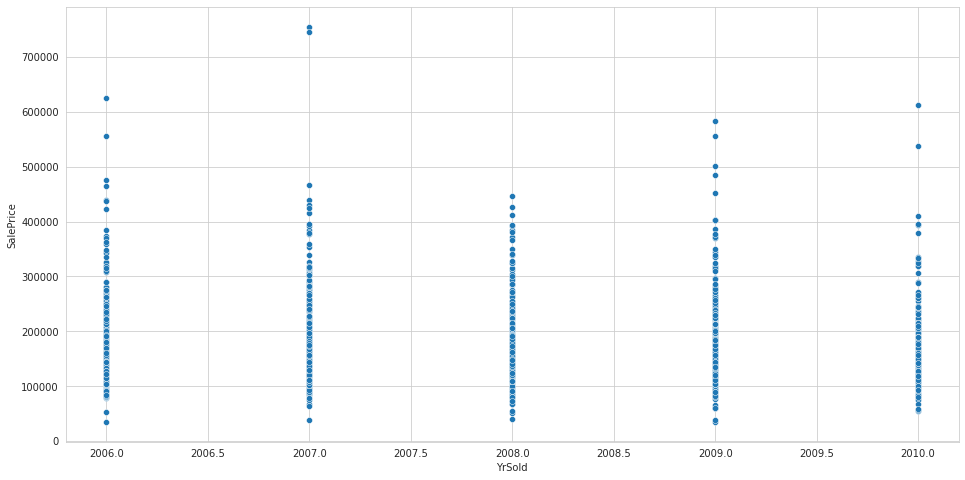

In [ ]:
# Looking for the distribution of numderical columns, if there is anything that can cause a problem 
for col in numerical_columns:
  plt.figure(figsize=(16,8))
  sns.scatterplot(data = df, x = col, y='SalePrice')
  plt.show()


In [ ]:
df.shape

(1460, 73)

In [ ]:
# if there are any columns which only have one value
for col in numerical_columns:
  if df[col].value_counts().size == 1:
    print(df[col].value_counts()) 

### Checking for Correlation

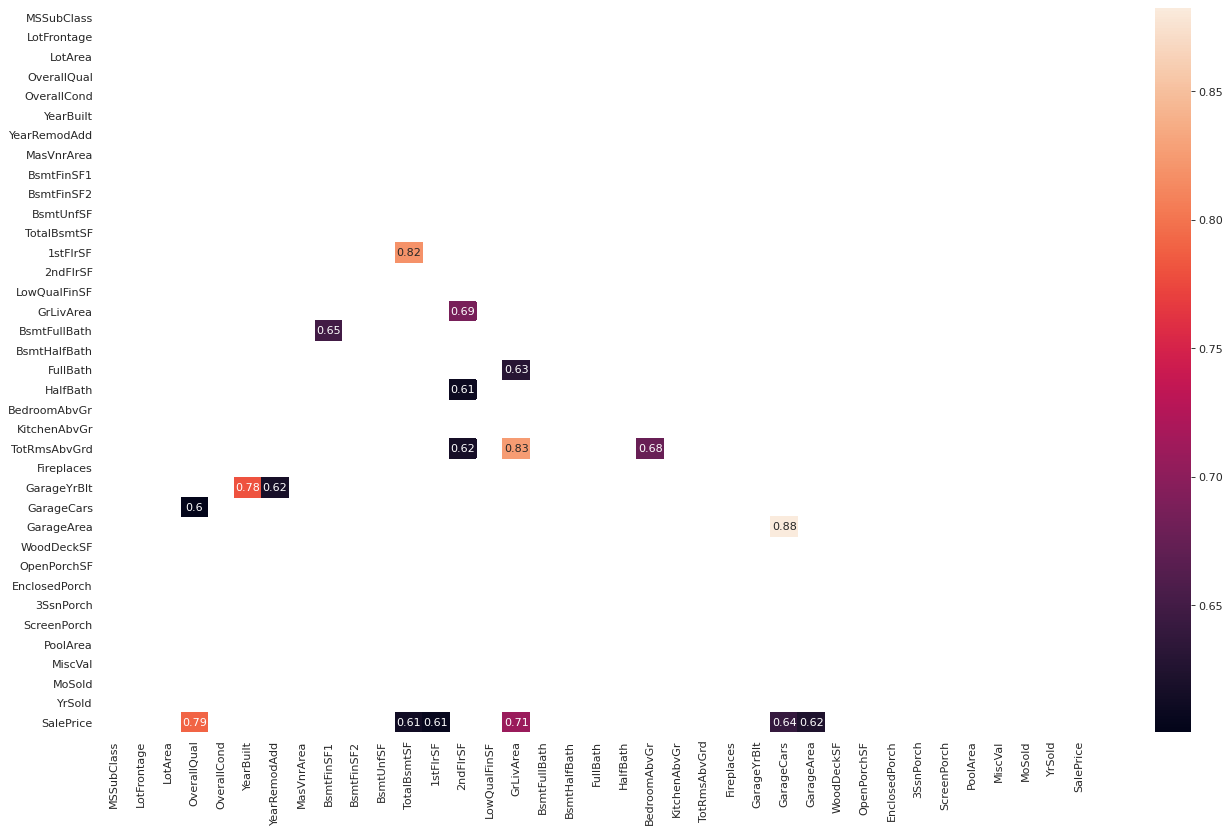

In [ ]:
# Check for the values having correlation higher the 0.6
corr = df.corr()
kot = corr[corr>=0.6]
plt.figure(figsize=(20, 12), dpi=80)
sns.heatmap(kot, annot=True, mask=np.triu(np.ones_like(kot)))

There are multiple columns which has high correlation, will need to handle that. 

In [ ]:
# Check the correlation with the target variable
test=df.corr()['SalePrice']
test.sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

OverallQual, GrLivArea, GarageCars, GarageArea and TotalBsmtSF are highly correlated to the SalePrice i.e. the target variable.

## Data preperation

In [ ]:
# Dumifying all columns using a loop
for col in categorical_columns:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df = pd.concat([df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)

df.head()

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0          60         65.0  ...                     1                      0
1          20         80.0  ...                     1                      0
2          60         68.0  ...                     1                      0
3          70         60.0  ...                     0                      0
4          60         84.0  ...                     1                      0

[5 rows x 231 columns]

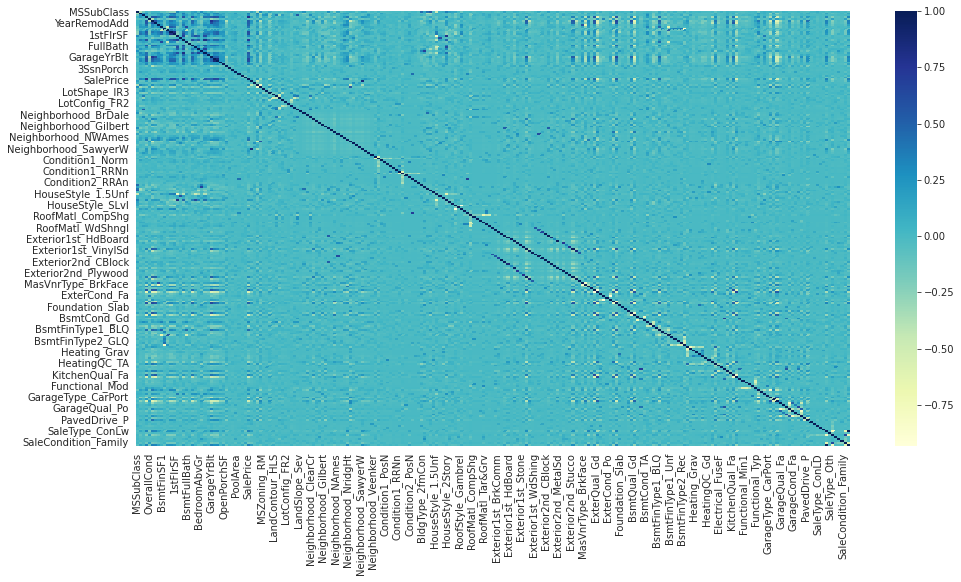

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

**The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.**

In [ ]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df[numerical_columns]))
# Outlier Removed Records
selected = df[numerical_columns][(z < 3).all(axis=1)]
df = df.loc[selected.index]
df

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0             60         65.0  ...                     1                      0
2             60         68.0  ...                     1                      0
4             60         84.0  ...                     1                      0
6             20         75.0  ...                     1                      0
10            20         70.0  ...                     1                      0
...          ...          ...  ...                   ...                    ...
1452         180         35.0  ...                     1                      0
1453          20         90.0  ...                     0                      0
1454          20         62.0  ...                     1                      0
1455          60         62.0  ...                     1                      0
1456          20         85.0  ...                     1                      0

[1021 rows x 231 columns]

In [ ]:
df.shape

(1021, 231)

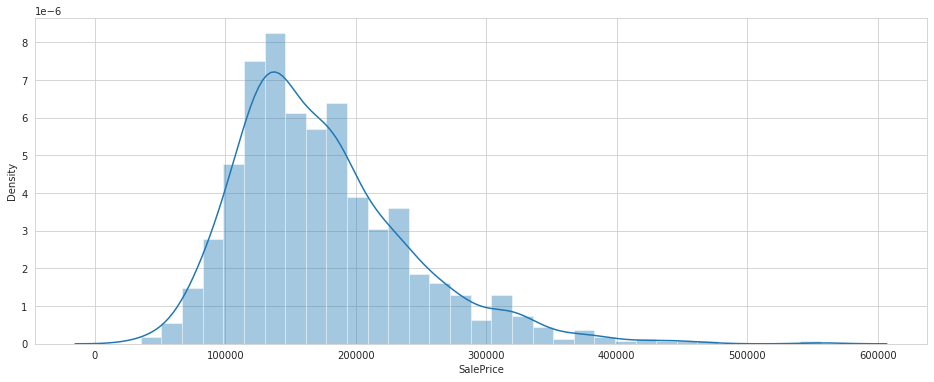

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

### Creating train and test dataset for validation purpose

In [ ]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
df_train.head()

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
333          120    59.000000  ...                     1                      0
1254          60    60.000000  ...                     1                      0
518           60    70.049958  ...                     1                      0
1174          70    80.000000  ...                     1                      0
255           60    66.000000  ...                     1                      0

[5 rows x 231 columns]

In [ ]:
df_test.head()

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
756          60         68.0  ...                     1                      0
864          20         72.0  ...                     0                      1
759          60         65.0  ...                     1                      0
45          120         61.0  ...                     1                      0
880          20         60.0  ...                     1                      0

[5 rows x 231 columns]

### Scaling

In [ ]:
scaler = MinMaxScaler()
df_train[numerical_columns].describe()

MSSubClass  LotFrontage  ...      MoSold       YrSold
count  714.000000   714.000000  ...  714.000000   714.000000
mean    53.172269    67.828284  ...    6.236695  2007.798319
std     39.979655    17.874341  ...    2.665819     1.363190
min     20.000000    21.000000  ...    1.000000  2006.000000
25%     20.000000    60.000000  ...    4.000000  2007.000000
50%     50.000000    70.049958  ...    6.000000  2008.000000
75%     60.000000    77.000000  ...    8.000000  2009.000000
max    180.000000   129.000000  ...   12.000000  2010.000000

[8 rows x 36 columns]

In [ ]:
# fit transform
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])


In [ ]:
df_train[numerical_columns].describe()

MSSubClass  LotFrontage     LotArea  ...     MiscVal      MoSold      YrSold
count  714.000000   714.000000  714.000000  ...  714.000000  714.000000  714.000000
mean     0.207327     0.433595    0.278395  ...    0.010131    0.476063    0.449580
std      0.249873     0.165503    0.129185  ...    0.073821    0.242347    0.340797
min      0.000000     0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000     0.361111    0.209507  ...    0.000000    0.272727    0.250000
50%      0.187500     0.454166    0.274364  ...    0.000000    0.454545    0.500000
75%      0.250000     0.518519    0.343697  ...    0.000000    0.636364    0.750000
max      1.000000     1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 36 columns]

In [ ]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [ ]:
len(X_train.columns)

230

In [ ]:
X_train.head()

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
333       0.6250     0.351852  ...                     1                      0
1254      0.2500     0.361111  ...                     1                      0
518       0.2500     0.454166  ...                     1                      0
1174      0.3125     0.546296  ...                     1                      0
255       0.2500     0.416667  ...                     1                      0

[5 rows x 230 columns]

## Model Building and Evaluation

### Linear Regression Model

In [ ]:
lm  = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)
print(lm.coef_)

rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

8871671250521509.0
[-3.18010869e+04 -7.93994297e+03  2.27573201e+04  3.90194565e+04
  2.74230061e+04  4.24247762e+04  3.75806681e+03  5.81552838e+03
  4.72068037e+15  1.50627963e+15  5.63047327e+15 -6.50110290e+15
  1.51498174e+16  1.25181178e+16  7.01786560e+14 -2.19132853e+16
  1.66775540e+03 -1.33221934e+15  1.08774583e+04  5.47934798e+03
 -9.97829568e+03  7.90925138e+15 -6.00028219e+02  9.39208304e+03
 -1.09427155e+04  1.47417920e+04  2.23902516e+04  1.01300365e+04
  6.86711174e+03  2.16666830e+03 -1.62325398e+04  1.10044786e+04
 -6.78896890e+14  1.38557500e+04  3.62750000e+02 -2.89975000e+03
  2.87805000e+04  3.06687500e+04  2.71562500e+04  2.82382500e+04
  5.88925000e+03 -1.25866562e+04  1.47000000e+02 -4.22962500e+03
 -9.59568750e+03 -4.53201562e+03  4.31335938e+03 -8.77225000e+03
 -1.58123125e+04 -5.52500000e+02  4.38150000e+03  5.00259375e+03
 -2.10054844e+04 -4.18525000e+03 -4.09350000e+03 -8.18975000e+03
 -1.47472500e+04  1.59106250e+04 -1.70470000e+04 -1.25439375e+04
 -9.35

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [ ]:
y_pred_train_lm= lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

metric = []
r2_train_lm = r2_score(y_train, y_pred_train_lm)
print(r2_train_lm)
metric.append(r2_train_lm)

r2_test_lm = r2_score(y_test, y_pred_test_lm)
print(r2_test_lm)
metric.append(r2_test_lm)

rss1_lm = np.sum(np.square(y_train, y_pred_train_lm))
print(rss1_lm)
metric.append(rss1_lm)

rss2_lm = np.sum(np.square(y_test, y_pred_test_lm))
print(rss2_lm)
metric.append(rss2_lm)


mse_train_lm = mean_squared_error(y_train, y_pred_train_lm)
print(mse_train_lm)
metric.append(mse_train_lm**0.5)

mse_test_lm = mean_squared_error(y_test, y_pred_test_lm)
print(mse_test_lm)
metric.append(mse_test_lm**0.5)

0.9555502229300336
-4.998134583935821e+16
24345242554590.0
11303722271195.0
2.006298439247415e+21
2.2984928705477188e+21


In [ ]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [ ]:
rfe_scores.sort_values(by='Rank')

Column_Names  Status  Rank
114    Exterior1st_AsphShn    True     1
111       RoofMatl_Tar&Grv    True     1
112       RoofMatl_WdShake    True     1
113       RoofMatl_WdShngl    True     1
117     Exterior1st_CBlock    True     1
..                     ...     ...   ...
184           HeatingQC_Po   False   157
189         Electrical_Mix   False   158
198         Functional_Sev   False   159
180           Heating_OthW   False   160
225  SaleCondition_AdjLand   False   161

[230 rows x 3 columns]

In [ ]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [ ]:
# Lets filter the train and test set for the RFE selected columns
X_train_rfe = X_train[rfe_sel_columns]
X_test_rfe = X_test[rfe_sel_columns]
X_train_rfe.head()

OverallQual  OverallCond  ...  SaleType_Con  SaleCondition_Alloca
333         0.625          0.4  ...             0                     0
1254        0.625          0.4  ...             0                     0
518         0.500          0.4  ...             0                     0
1174        0.500          1.0  ...             0                     0
255         0.625          0.4  ...             0                     0

[5 rows x 70 columns]

In [ ]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 333 to 143
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           714 non-null    float64
 1   OverallCond           714 non-null    float64
 2   YearBuilt             714 non-null    float64
 3   BsmtFinSF1            714 non-null    float64
 4   BsmtFinSF2            714 non-null    float64
 5   BsmtUnfSF             714 non-null    float64
 6   TotalBsmtSF           714 non-null    float64
 7   1stFlrSF              714 non-null    float64
 8   2ndFlrSF              714 non-null    float64
 9   LowQualFinSF          714 non-null    float64
 10  GrLivArea             714 non-null    float64
 11  BsmtHalfBath          714 non-null    float64
 12  KitchenAbvGr          714 non-null    float64
 13  GarageArea            714 non-null    float64
 14  PoolArea              714 non-null    float64
 15  Neighborhood_Crawfor 

### Ridge Regression

In [ ]:
ridge = Ridge(alpha=100.0)
ridge.fit(X_train_rfe,y_train)

y_train_pred = ridge.predict(X_train_rfe)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test_rfe)
print(r2_score(y_test,y_test_pred))

0.7188467029625336
0.7071859798592333


As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score
Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [ ]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001,0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 10]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train_rfe,y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.009299      0.003221  ...          0.912736         0.003294
1       0.005697      0.002732  ...          0.912736         0.003294
2       0.005920      0.002955  ...          0.912735         0.003294
3       0.004598      0.000920  ...          0.912655         0.003281
4       0.007432      0.004909  ...          0.910687         0.003056

[5 rows x 31 columns]

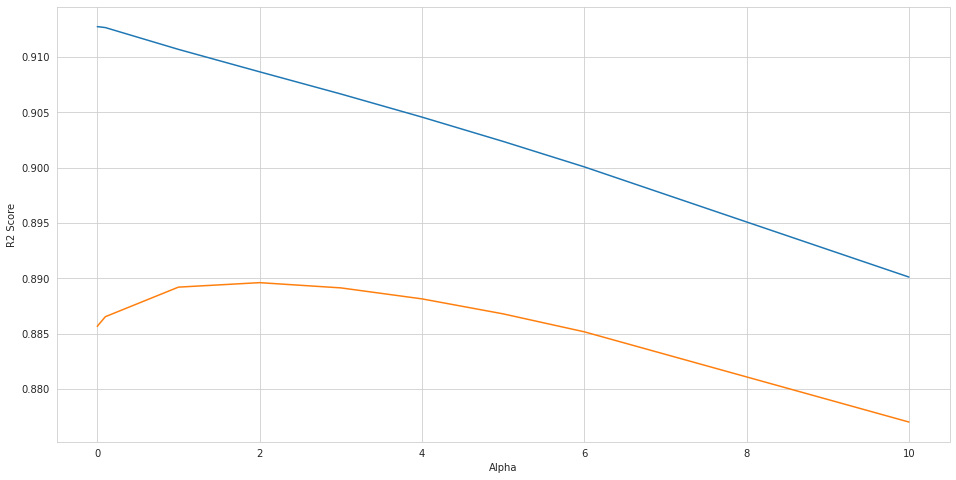

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 2.0}

In [ ]:
# fit train/test model with best alpha value
ridge = Ridge(alpha = 2.0)
ridge.fit(X_train_rfe,y_train)

y_pred_train = ridge.predict(X_train_rfe)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test_rfe)
print(r2_score(y_test,y_pred_test))

print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

0.9083437093793005
0.8815395027369682
398331221.3849046
572159975.9730617


In [ ]:
# this is to check question one of the subjective questions
ridge2 = Ridge(alpha=4.0)
ridge2.fit(X_train_rfe,y_train)

y_pred_ridge_train = ridge2.predict(X_train_rfe)
y_pred_ridge_test = ridge2.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_pred_ridge_train))
print(r2_score(y_true=y_test,y_pred=y_pred_ridge_test))
print(mean_squared_error(y_train, y_pred_ridge_train))
print(mean_squared_error(y_test, y_pred_ridge_test))

0.9047651239858987
0.8798599312608966
413883479.510677
580272246.2876158


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

# Check for important predictor
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure          Coef
1            OverallCond  61381.474301
11          BsmtHalfBath  60561.346378
0            OverallQual  55679.448031
8               2ndFlrSF  53122.834530
14              PoolArea  46228.378616
9           LowQualFinSF  41919.183332
3             BsmtFinSF1  40289.592696
4             BsmtFinSF2  36863.670716
7               1stFlrSF  35934.102945
16  Neighborhood_StoneBr  33120.071380

In [ ]:
model_parameter2 = list(ridge2.coef_)
model_parameter2.insert(0,ridge2.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'constant')
ridge2_coef = pd.DataFrame(list(zip(cols,model_parameter2)))
ridge2_coef.columns = ['Feaure','Coef']

# Check for important predictor
ridge2_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure          Coef
1            OverallCond  58487.598176
11          BsmtHalfBath  58241.096840
0            OverallQual  55393.482924
8               2ndFlrSF  50338.201956
14              PoolArea  45565.668075
9           LowQualFinSF  41159.245363
4             BsmtFinSF2  37295.450752
3             BsmtFinSF1  37023.311002
7               1stFlrSF  36670.745374
16  Neighborhood_StoneBr  30531.167157

### Lasso Regression model

In [ ]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_rfe,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9121271841692137
0.8783942545280445


In [ ]:
lm.intercept_

83548.09228663586

In [ ]:

model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train_rfe.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('OverallQual', 83548.092),
 ('OverallCond', 59786.339),
 ('YearBuilt', 32327.559),
 ('BsmtFinSF1', 42585.269),
 ('BsmtFinSF2', 45506.586),
 ('BsmtUnfSF', 1844.369),
 ('TotalBsmtSF', 22073.939),
 ('1stFlrSF', 19959.336),
 ('2ndFlrSF', 84670.832),
 ('LowQualFinSF', 65573.65),
 ('GrLivArea', -5151.187),
 ('BsmtHalfBath', 24328.043),
 ('KitchenAbvGr', 0.0),
 ('GarageArea', 0.0),
 ('PoolArea', 47331.33),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_StoneBr', 37267.917),
 ('Condition2_Feedr', 31170.714),
 ('Condition2_Norm', -17551.053),
 ('Condition2_PosA', -4982.486),
 ('Condition2_PosN', 0.0),
 ('Condition2_RRAe', 0.0),
 ('Condition2_RRAn', 0.0),
 ('Condition2_RRNn', 0.0),
 ('BldgType_2fmCon', 15599.568),
 ('HouseStyle_2.5Unf', -59677.202),
 ('RoofStyle_Gable', 0.0),
 ('RoofStyle_Gambrel', 957.285),
 ('RoofStyle_Hip', -517.085),
 ('RoofStyle_Mansard', -557.333),
 ('RoofStyle_Shed', 9202.692),
 ('RoofMatl_CompShg', 0.0),
 ('RoofMatl_Membran', 270.484),
 ('RoofMatl_Metal', 0.0),
 ('Roo

**Now lets try to improve our model with the optimal value of alpha using GridSearchCV**

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train_rfe,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.068311      0.018891  ...          0.912736         0.003294
1       0.084749      0.018621  ...          0.912736         0.003294
2       0.054883      0.015506  ...          0.912736         0.003294
3       0.061200      0.016799  ...          0.912732         0.003294
4       0.041057      0.011344  ...          0.912384         0.003269
5       0.010810      0.004562  ...          0.905566         0.002760
6       0.005900      0.004245  ...          0.854870         0.004155

[7 rows x 31 columns]

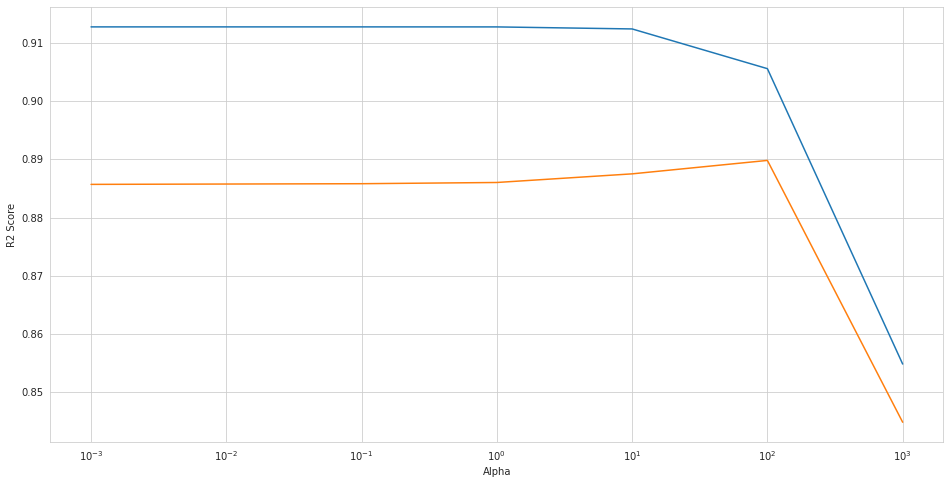

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [ ]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 100.0}

In [ ]:
lasso = Lasso(alpha=100.0)
lasso.fit(X_train_rfe,y_train)

y_train_pred = lasso.predict(X_train_rfe)
y_test_pred = lasso.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.9048909380674727
0.8823024374662566
413336701.1450961
568475028.4465512


In [ ]:
# this is to check question one of the subjective questions
lasso2 = Lasso(alpha=200.0)
lasso2.fit(X_train_rfe,y_train)

y_train_pred2 = lasso2.predict(X_train_rfe)
y_test_pred2 = lasso2.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred2))
print(r2_score(y_true=y_test,y_pred=y_test_pred2))
print(mean_squared_error(y_train, y_train_pred2))
print(mean_squared_error(y_test, y_test_pred2))

0.9006489247260978
0.8808727752116701
431772166.33747995
575380246.1362721


In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

# Check the importance of predictors
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere           Coef
11          BsmtHalfBath  134925.239287
1            OverallCond   71366.083449
7               1stFlrSF   44594.254514
14              PoolArea   43859.265474
3             BsmtFinSF1   43288.638243
0            OverallQual   38731.187633
16  Neighborhood_StoneBr   31429.409425
4             BsmtFinSF2   28688.846649
2              YearBuilt   27361.771676
17      Condition2_Feedr   24957.119362

In [ ]:
model_param2 = list(lasso2.coef_)
model_param2.insert(0,lasso2.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso2_coef = pd.DataFrame(list(zip(cols,model_param2)))
lasso2_coef.columns = ['Featuere','Coef']

# Check the importance of predictors
lasso2_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere           Coef
11          BsmtHalfBath  133464.156579
1            OverallCond   75219.305820
7               1stFlrSF   44403.254293
14              PoolArea   42156.859755
3             BsmtFinSF1   40278.278655
0            OverallQual   35263.857621
4             BsmtFinSF2   29444.653342
16  Neighborhood_StoneBr   26591.857822
2              YearBuilt   22664.864360
17      Condition2_Feedr   19415.046580

### Final model: 
After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model

In [ ]:
y_pred_train_ridge = ridge.predict(X_train_rfe)
y_pred_test_ridge = ridge.predict(X_test_rfe)

print('Final train score for r2 using Ridge ', r2_score(y_train,y_pred_train_ridge))
print('Final test score for r2 using Ridge ',r2_score(y_test,y_pred_test_ridge))
               

y_train_pred_lasso = lasso.predict(X_train_rfe)
y_test_pred_lasso = lasso.predict(X_test_rfe)

print('Final train score for r2 using Lasso ',r2_score(y_true=y_train,y_pred=y_train_pred_lasso))
print('Final test score for r2 using Lasso ',r2_score(y_true=y_test,y_pred=y_test_pred_lasso))

Final train score for r2 using Ridge  0.9083437093793005
Final test score for r2 using Ridge  0.8815395027369682
Final train score for r2 using Lasso  0.9048909380674727
Final test score for r2 using Lasso  0.8823024374662566


In [ ]:
final_model = Lasso(alpha=100.0)
final_model.fit(X_train_rfe,y_train)

y_train_pred = final_model.predict(X_train_rfe)
y_test_pred = final_model.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9048909380674727
0.8823024374662566


In [ ]:
final_model_parameter = list(final_model.coef_)
final_model_parameter.insert(0,final_model.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'constant')
final_model_coef = pd.DataFrame(list(zip(cols,final_model_parameter)))
final_model_coef.columns = ['Feaure','Coef']

In [ ]:
# As per Lasso regularization,below attributes are not needed
final_model_coef[final_model_coef.Coef==0]

Feaure  Coef
5              BsmtUnfSF  -0.0
6            TotalBsmtSF   0.0
9           LowQualFinSF   0.0
10             GrLivArea  -0.0
12          KitchenAbvGr   0.0
13            GarageArea   0.0
15  Neighborhood_Crawfor   0.0
18       Condition2_Norm  -0.0
19       Condition2_PosA   0.0
20       Condition2_PosN   0.0
21       Condition2_RRAe   0.0
22       Condition2_RRAn   0.0
23       Condition2_RRNn   0.0
24       BldgType_2fmCon   0.0
25     HouseStyle_2.5Unf  -0.0
26       RoofStyle_Gable   0.0
28         RoofStyle_Hip  -0.0
29     RoofStyle_Mansard  -0.0
30        RoofStyle_Shed  -0.0
31      RoofMatl_CompShg   0.0
32      RoofMatl_Membran   0.0
33        RoofMatl_Metal   0.0
34         RoofMatl_Roll   0.0
35      RoofMatl_Tar&Grv   0.0
36      RoofMatl_WdShake   0.0
37      RoofMatl_WdShngl  -0.0
38   Exterior1st_AsphShn   0.0
39    Exterior1st_CBlock   0.0
40     Exterior1st_Stone  -0.0
41    Exterior2nd_CBlock   0.0
42          ExterQual_Gd  -0.0
45          ExterCond_Gd  -0.0
46          ExterCond_TA  -0.0
51          Heating_GasW  -0.0
52          Heating_Grav   0.0
53          Heating_Wall   0.0
54        Functional_Mod   0.0
59     GarageType_Detchd  -0.0
60         GarageQual_Fa  -0.0
61         GarageQual_Gd  -0.0
62         GarageQual_Po  -0.0
63         GarageQual_TA  -0.0
64         GarageCond_Fa   0.0
66         GarageCond_Po  -0.0
67         GarageCond_TA   0.0
68          SaleType_Con   0.0
69  SaleCondition_Alloca   0.0

In [ ]:
# As per Lasso regularization,below attributes are needed
final_model_coef[final_model_coef.Coef!=0].sort_values(by='Coef', ascending=False)

Feaure           Coef
11          BsmtHalfBath  134925.239287
1            OverallCond   71366.083449
7               1stFlrSF   44594.254514
14              PoolArea   43859.265474
3             BsmtFinSF1   43288.638243
0            OverallQual   38731.187633
16  Neighborhood_StoneBr   31429.409425
4             BsmtFinSF2   28688.846649
2              YearBuilt   27361.771676
17      Condition2_Feedr   24957.119362
58    GarageType_CarPort   13829.962551
47           BsmtQual_Fa    7012.891484
8               2ndFlrSF    4621.528836
56    GarageType_Basment    4107.460073
27     RoofStyle_Gambrel     169.111314
65         GarageCond_Gd    -704.271612
57    GarageType_BuiltIn   -4698.005570
55     GarageType_Attchd   -8072.330573
43          ExterQual_TA  -12968.043641
44          ExterCond_Fa  -23184.459318
48           BsmtQual_Gd  -33599.355507
49           BsmtQual_TA  -43367.808803
50          Heating_GasA  -43465.445556

In [ ]:
final_model_coef[final_model_coef.Coef!=0].shape

(23, 2)

We can see the how much the Lasso regularization has splified our modelling as per Lasso we only need to consider arround 20-25 attributes to explain around 90% of variation.

In [ ]:
# top 5 positively correlated attributes
final_model_coef[final_model_coef.Coef!=0].sort_values(by='Coef', ascending=False)[:5]

Feaure           Coef
11  BsmtHalfBath  134925.239287
1    OverallCond   71366.083449
7       1stFlrSF   44594.254514
14      PoolArea   43859.265474
3     BsmtFinSF1   43288.638243

The best feature that explain the dataset are:
- BsmtHalfBath	
- OverallQual
- 1stFlrSF
- PoolArea	
- BsmtFinSF1	

In [ ]:
# Answer to - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
# You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?
final_model2 = Lasso(alpha=100.0)
X_train2 = X_train_rfe.drop(['BsmtHalfBath', 'OverallCond', '1stFlrSF', 'PoolArea','BsmtFinSF1'],1)
X_test2 = X_test_rfe.drop(['BsmtHalfBath', 'OverallCond', '1stFlrSF', 'PoolArea','BsmtFinSF1'],1)

In [ ]:
final_model2.fit(X_train2,y_train)

y_train_pred = final_model2.predict(X_train2)
y_test_pred = final_model2.predict(X_test2)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8985154626222255
0.8758751000196047


As we can see above although we have removed the most important predictor althought the r2 score went a little down but still the model is doing quite well.

In [ ]:
final_model2_parameter = list(final_model2.coef_)
final_model2_parameter.insert(0,final_model2.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'constant')
final_model2_coef = pd.DataFrame(list(zip(cols,final_model2_parameter)))
final_model2_coef.columns = ['Feature','Coef']

In [ ]:
# top 5 positively correlated attributes
final_model2_coef[final_model2_coef.Coef!=0].sort_values(by='Coef', ascending=False)[:5]

Feaure           Coef
8      2ndFlrSF  132542.223220
5     BsmtUnfSF   86449.262702
1   OverallCond   78022.824675
0   OverallQual   56603.442370
10    GrLivArea   46202.339661